Coire Gavin-Hanner 6-2020

# Intro

This notebook will take you through the workflow I used for running MD jobs and analysing the results. This workflow applies to:
- MD run of any length
- MD runs with custom residues (forcefields developed in CGenFF tutorial)
- MD runs with multiple protein chains
- MD runs with multiple replicates (that are analyzed together)

This workflow is not meant for more complicated MD jobs such as those using advanced sampling techniques like REMD

The PDB file used in this is from an E. coli ACP/FabA complex. It includes 4 distinct protein chains, a cyanylated Ppant arm in a custom residue called PCN, and Histidine residues that need to be in specific protonation states

If you have any questions, I can be reached at either cgavinhann@haverford.edu or c.gavin.hanner@gmail.com

## File names
The following is how I organized my md files. After spending a lot of time trying to figure out what I did in old directories and which misplaced files were which, I adopted this system. This is here only as a suggestion, if you have a system that works for you, please ignore the following. 
- when I start a new "experiment", put it in a new directory and give it a name/number, just like starting a new lab notebook page
    - I like to name directories after the date that they were created, when I run through this tutorial, I will name the directory 200616 for june 16, 2020
- I treat files in the directory like samples in the lab and name them accordingly
    - it is common for MD files from different runs to have the same name
    - It is also common to move files through directories, if you make a mistake and put a file into the wrong directory, you want it to be easy to figure out       where the file belongs
    - I accomplish this by putting the directory name in front of files in that directory
        - ex: 200616_md.mdp
- I Keep a "table of contents" in a README file. I used a README.ipynb jupyter notebook which allowed me to easily format a table
    - include paths to each directory
    - Descriptions of what I did in each directory allow me to easily find where I did specific things
    - I found this easier than trying to name each directory with a short, descriptive name and trying to figure out what that name means later
    
    
I will follow this system in the tutorial. After you clone the repository to your WS account, change the name of the directory and the name of the files in it. Then run the following cell to edit the commands in the rest of the notebook

In [ ]:
# This will change "200616" to something else in every line of this notebook
#!sed -i 's/200616/whateveryouwant/g' 200616.ipynb

## Starting Files

- 200616.pdb (an version of 4keh edited to work with  mdified forcefield)
- charmm36-190509.ff and residuetypes.dat (from the forcefields repository on CHL github)
- .mdp files taken from lysozyme tutorial and edited

# Running an single MD job

In [40]:
! gmx editconf -f 200616.gro -o 200616_newbox.gro -c -d 1.0 -bt dodecahedron

                 :-) GROMACS - gmx editconf, VERSION 5.1.2 (-:

                            GROMACS is written by:
     Emile Apol      Rossen Apostolov  Herman J.C. Berendsen    Par Bjelkmar   
 Aldert van Buuren   Rudi van Drunen     Anton Feenstra   Sebastian Fritsch 
  Gerrit Groenhof   Christoph Junghans   Anca Hamuraru    Vincent Hindriksen
 Dimitrios Karkoulis    Peter Kasson        Jiri Kraus      Carsten Kutzner  
    Per Larsson      Justin A. Lemkul   Magnus Lundborg   Pieter Meulenhoff 
   Erik Marklund      Teemu Murtola       Szilard Pall       Sander Pronk   
   Roland Schulz     Alexey Shvetsov     Michael Shirts     Alfons Sijbers  
   Peter Tieleman    Teemu Virolainen  Christian Wennberg    Maarten Wolf   
                           and the project leaders:
        Mark Abraham, Berk Hess, Erik Lindahl, and David van der Spoel

Copyright (c) 1991-2000, University of Groningen, The Netherlands.
Copyright (c) 2001-2015, The GROMACS development team at
Uppsala Universit

In [41]:
! gmx solvate -cp 200616_newbox.gro -cs spc216.gro -o 200616_solv.gro -p 200616_topol.top

                  :-) GROMACS - gmx solvate, VERSION 5.1.2 (-:

                            GROMACS is written by:
     Emile Apol      Rossen Apostolov  Herman J.C. Berendsen    Par Bjelkmar   
 Aldert van Buuren   Rudi van Drunen     Anton Feenstra   Sebastian Fritsch 
  Gerrit Groenhof   Christoph Junghans   Anca Hamuraru    Vincent Hindriksen
 Dimitrios Karkoulis    Peter Kasson        Jiri Kraus      Carsten Kutzner  
    Per Larsson      Justin A. Lemkul   Magnus Lundborg   Pieter Meulenhoff 
   Erik Marklund      Teemu Murtola       Szilard Pall       Sander Pronk   
   Roland Schulz     Alexey Shvetsov     Michael Shirts     Alfons Sijbers  
   Peter Tieleman    Teemu Virolainen  Christian Wennberg    Maarten Wolf   
                           and the project leaders:
        Mark Abraham, Berk Hess, Erik Lindahl, and David van der Spoel

Copyright (c) 1991-2000, University of Groningen, The Netherlands.
Copyright (c) 2001-2015, The GROMACS development team at
Uppsala Universit

In [42]:
! gmx grompp -f 200616_ions.mdp -c 200616_solv.gro -p 200616_topol.top -o 200616_ions.tpr

                  :-) GROMACS - gmx grompp, VERSION 5.1.2 (-:

                            GROMACS is written by:
     Emile Apol      Rossen Apostolov  Herman J.C. Berendsen    Par Bjelkmar   
 Aldert van Buuren   Rudi van Drunen     Anton Feenstra   Sebastian Fritsch 
  Gerrit Groenhof   Christoph Junghans   Anca Hamuraru    Vincent Hindriksen
 Dimitrios Karkoulis    Peter Kasson        Jiri Kraus      Carsten Kutzner  
    Per Larsson      Justin A. Lemkul   Magnus Lundborg   Pieter Meulenhoff 
   Erik Marklund      Teemu Murtola       Szilard Pall       Sander Pronk   
   Roland Schulz     Alexey Shvetsov     Michael Shirts     Alfons Sijbers  
   Peter Tieleman    Teemu Virolainen  Christian Wennberg    Maarten Wolf   
                           and the project leaders:
        Mark Abraham, Berk Hess, Erik Lindahl, and David van der Spoel

Copyright (c) 1991-2000, University of Groningen, The Netherlands.
Copyright (c) 2001-2015, The GROMACS development team at
Uppsala University

In [43]:
! echo 13 | gmx genion -s 200616_ions.tpr -o 200616_solv_ions.gro -p 200616_topol.top -pname NA -nname CL -np 34
#option 13 for solvent molecule "SOL"

                  :-) GROMACS - gmx genion, VERSION 5.1.2 (-:

                            GROMACS is written by:
     Emile Apol      Rossen Apostolov  Herman J.C. Berendsen    Par Bjelkmar   
 Aldert van Buuren   Rudi van Drunen     Anton Feenstra   Sebastian Fritsch 
  Gerrit Groenhof   Christoph Junghans   Anca Hamuraru    Vincent Hindriksen
 Dimitrios Karkoulis    Peter Kasson        Jiri Kraus      Carsten Kutzner  
    Per Larsson      Justin A. Lemkul   Magnus Lundborg   Pieter Meulenhoff 
   Erik Marklund      Teemu Murtola       Szilard Pall       Sander Pronk   
   Roland Schulz     Alexey Shvetsov     Michael Shirts     Alfons Sijbers  
   Peter Tieleman    Teemu Virolainen  Christian Wennberg    Maarten Wolf   
                           and the project leaders:
        Mark Abraham, Berk Hess, Erik Lindahl, and David van der Spoel

Copyright (c) 1991-2000, University of Groningen, The Netherlands.
Copyright (c) 2001-2015, The GROMACS development team at
Uppsala University

In [44]:
! gmx grompp -f 200616_minim.mdp -c 200616_solv_ions.gro -p 200616_topol.top -o 200616_em.tpr

                  :-) GROMACS - gmx grompp, VERSION 5.1.2 (-:

                            GROMACS is written by:
     Emile Apol      Rossen Apostolov  Herman J.C. Berendsen    Par Bjelkmar   
 Aldert van Buuren   Rudi van Drunen     Anton Feenstra   Sebastian Fritsch 
  Gerrit Groenhof   Christoph Junghans   Anca Hamuraru    Vincent Hindriksen
 Dimitrios Karkoulis    Peter Kasson        Jiri Kraus      Carsten Kutzner  
    Per Larsson      Justin A. Lemkul   Magnus Lundborg   Pieter Meulenhoff 
   Erik Marklund      Teemu Murtola       Szilard Pall       Sander Pronk   
   Roland Schulz     Alexey Shvetsov     Michael Shirts     Alfons Sijbers  
   Peter Tieleman    Teemu Virolainen  Christian Wennberg    Maarten Wolf   
                           and the project leaders:
        Mark Abraham, Berk Hess, Erik Lindahl, and David van der Spoel

Copyright (c) 1991-2000, University of Groningen, The Netherlands.
Copyright (c) 2001-2015, The GROMACS development team at
Uppsala University

In [45]:
! gmx mdrun -deffnm 200616_em

                   :-) GROMACS - gmx mdrun, VERSION 5.1.2 (-:

                            GROMACS is written by:
     Emile Apol      Rossen Apostolov  Herman J.C. Berendsen    Par Bjelkmar   
 Aldert van Buuren   Rudi van Drunen     Anton Feenstra   Sebastian Fritsch 
  Gerrit Groenhof   Christoph Junghans   Anca Hamuraru    Vincent Hindriksen
 Dimitrios Karkoulis    Peter Kasson        Jiri Kraus      Carsten Kutzner  
    Per Larsson      Justin A. Lemkul   Magnus Lundborg   Pieter Meulenhoff 
   Erik Marklund      Teemu Murtola       Szilard Pall       Sander Pronk   
   Roland Schulz     Alexey Shvetsov     Michael Shirts     Alfons Sijbers  
   Peter Tieleman    Teemu Virolainen  Christian Wennberg    Maarten Wolf   
                           and the project leaders:
        Mark Abraham, Berk Hess, Erik Lindahl, and David van der Spoel

Copyright (c) 1991-2000, University of Groningen, The Netherlands.
Copyright (c) 2001-2015, The GROMACS development team at
Uppsala University

In [46]:
! echo 1 | gmx trjconv -f 200616_em.trr -s 200616_em.tpr -o 200616_em.pdb

                  :-) GROMACS - gmx trjconv, VERSION 5.1.2 (-:

                            GROMACS is written by:
     Emile Apol      Rossen Apostolov  Herman J.C. Berendsen    Par Bjelkmar   
 Aldert van Buuren   Rudi van Drunen     Anton Feenstra   Sebastian Fritsch 
  Gerrit Groenhof   Christoph Junghans   Anca Hamuraru    Vincent Hindriksen
 Dimitrios Karkoulis    Peter Kasson        Jiri Kraus      Carsten Kutzner  
    Per Larsson      Justin A. Lemkul   Magnus Lundborg   Pieter Meulenhoff 
   Erik Marklund      Teemu Murtola       Szilard Pall       Sander Pronk   
   Roland Schulz     Alexey Shvetsov     Michael Shirts     Alfons Sijbers  
   Peter Tieleman    Teemu Virolainen  Christian Wennberg    Maarten Wolf   
                           and the project leaders:
        Mark Abraham, Berk Hess, Erik Lindahl, and David van der Spoel

Copyright (c) 1991-2000, University of Groningen, The Netherlands.
Copyright (c) 2001-2015, The GROMACS development team at
Uppsala Universit

In [62]:
import py3Dmol
cut=1
pdbdata=open('200616_em.pdb', 'r').read()
view=py3Dmol.view()
view.addModel(pdbdata,'pdb')
chA = {'resi':'1-35'}
chB = {'resi':'36'}
chC = {'resi':'37-77'}
D = {'resi' : '78-171'}
view.zoomTo()
view.setBackgroundColor('white')
view.setStyle(chA,{'cartoon':{'color':'spectrum'}})
view.setStyle(chC,{'cartoon':{'color':'spectrum'}})
view.setStyle(D,{'cartoon':{'color':'spectrum'}})
view.setStyle(chB, {'stick':{}})
#view.addSurface(py3Dmol.SAS,{'opacity':0.5,'colorscheme':{'prop':'b','gradient':'rwb','min':-cut,'max':cut}})
view

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

This might look strange after minimization. Sometimes parts of the protein cross the periodic boundary and appear to be disconnected. this is normal

In [48]:
!gmx grompp -f 200616_nvt.mdp -c 200616_em.gro -r 200616_em.gro -p 200616_topol.top -o 200616_nvt.tpr

                  :-) GROMACS - gmx grompp, VERSION 5.1.2 (-:

                            GROMACS is written by:
     Emile Apol      Rossen Apostolov  Herman J.C. Berendsen    Par Bjelkmar   
 Aldert van Buuren   Rudi van Drunen     Anton Feenstra   Sebastian Fritsch 
  Gerrit Groenhof   Christoph Junghans   Anca Hamuraru    Vincent Hindriksen
 Dimitrios Karkoulis    Peter Kasson        Jiri Kraus      Carsten Kutzner  
    Per Larsson      Justin A. Lemkul   Magnus Lundborg   Pieter Meulenhoff 
   Erik Marklund      Teemu Murtola       Szilard Pall       Sander Pronk   
   Roland Schulz     Alexey Shvetsov     Michael Shirts     Alfons Sijbers  
   Peter Tieleman    Teemu Virolainen  Christian Wennberg    Maarten Wolf   
                           and the project leaders:
        Mark Abraham, Berk Hess, Erik Lindahl, and David van der Spoel

Copyright (c) 1991-2000, University of Groningen, The Netherlands.
Copyright (c) 2001-2015, The GROMACS development team at
Uppsala University

In [63]:
!nohup gmx mdrun -deffnm 200616_nvt

nohup: ignoring input and appending output to 'nohup.out'


In [64]:
!gmx grompp -f 200616_npt.mdp -c 200616_nvt.gro -r 200616_nvt.gro -t 200616_nvt.cpt -p 200616_topol.top -o 200616_npt.tpr

                  :-) GROMACS - gmx grompp, VERSION 5.1.2 (-:

                            GROMACS is written by:
     Emile Apol      Rossen Apostolov  Herman J.C. Berendsen    Par Bjelkmar   
 Aldert van Buuren   Rudi van Drunen     Anton Feenstra   Sebastian Fritsch 
  Gerrit Groenhof   Christoph Junghans   Anca Hamuraru    Vincent Hindriksen
 Dimitrios Karkoulis    Peter Kasson        Jiri Kraus      Carsten Kutzner  
    Per Larsson      Justin A. Lemkul   Magnus Lundborg   Pieter Meulenhoff 
   Erik Marklund      Teemu Murtola       Szilard Pall       Sander Pronk   
   Roland Schulz     Alexey Shvetsov     Michael Shirts     Alfons Sijbers  
   Peter Tieleman    Teemu Virolainen  Christian Wennberg    Maarten Wolf   
                           and the project leaders:
        Mark Abraham, Berk Hess, Erik Lindahl, and David van der Spoel

Copyright (c) 1991-2000, University of Groningen, The Netherlands.
Copyright (c) 2001-2015, The GROMACS development team at
Uppsala University

In [65]:
!nohup gmx mdrun -deffnm 200616_npt

nohup: ignoring input and appending output to 'nohup.out'


In [66]:
!echo 1| gmx trjconv -f 200616_npt.trr -s 200616_npt.tpr -o 200616_npt.pdb

                  :-) GROMACS - gmx trjconv, VERSION 5.1.2 (-:

                            GROMACS is written by:
     Emile Apol      Rossen Apostolov  Herman J.C. Berendsen    Par Bjelkmar   
 Aldert van Buuren   Rudi van Drunen     Anton Feenstra   Sebastian Fritsch 
  Gerrit Groenhof   Christoph Junghans   Anca Hamuraru    Vincent Hindriksen
 Dimitrios Karkoulis    Peter Kasson        Jiri Kraus      Carsten Kutzner  
    Per Larsson      Justin A. Lemkul   Magnus Lundborg   Pieter Meulenhoff 
   Erik Marklund      Teemu Murtola       Szilard Pall       Sander Pronk   
   Roland Schulz     Alexey Shvetsov     Michael Shirts     Alfons Sijbers  
   Peter Tieleman    Teemu Virolainen  Christian Wennberg    Maarten Wolf   
                           and the project leaders:
        Mark Abraham, Berk Hess, Erik Lindahl, and David van der Spoel

Copyright (c) 1991-2000, University of Groningen, The Netherlands.
Copyright (c) 2001-2015, The GROMACS development team at
Uppsala Universit

In [67]:
!gmx grompp -f 200616_md.mdp -c 200616_npt.gro -t 200616_npt.cpt -p 200616_topol.top -o 200616_md_0-0.5ns.tpr

                  :-) GROMACS - gmx grompp, VERSION 5.1.2 (-:

                            GROMACS is written by:
     Emile Apol      Rossen Apostolov  Herman J.C. Berendsen    Par Bjelkmar   
 Aldert van Buuren   Rudi van Drunen     Anton Feenstra   Sebastian Fritsch 
  Gerrit Groenhof   Christoph Junghans   Anca Hamuraru    Vincent Hindriksen
 Dimitrios Karkoulis    Peter Kasson        Jiri Kraus      Carsten Kutzner  
    Per Larsson      Justin A. Lemkul   Magnus Lundborg   Pieter Meulenhoff 
   Erik Marklund      Teemu Murtola       Szilard Pall       Sander Pronk   
   Roland Schulz     Alexey Shvetsov     Michael Shirts     Alfons Sijbers  
   Peter Tieleman    Teemu Virolainen  Christian Wennberg    Maarten Wolf   
                           and the project leaders:
        Mark Abraham, Berk Hess, Erik Lindahl, and David van der Spoel

Copyright (c) 1991-2000, University of Groningen, The Netherlands.
Copyright (c) 2001-2015, The GROMACS development team at
Uppsala University

In [68]:
!nohup gmx mdrun -s 200616_md_0-0.5ns.tpr -o 200616_md.trr -cpo 200616_state.cpt

nohup: ignoring input and appending output to 'nohup.out'


## Analysis of 1 run

### Removing Periodicity in the trajectory
As you may have seen, the protein will sometimes drift across the boundary of the box during the simulation. If left alone, the protein will appear to be broken in the eyes of certain analysis methods. For example, if you run a RMSD calculation on the trajectory of a protein that crosses its periodic boundary, you will see a massive RMSD value. Because the protein corsses the boundary and appears on the other side of the box, the distance between atoms on the boundary goes from a couple angstroms to the entire width of the box, producing a huge RMSD. To fix this, we will run a series of trj_conv commands. The two  that I include here will work for me in this case, but if you notice, by looking at analysis plots or a movie of the trajectory, that the protein is still not centered throughout the trajectory, try running different trj_conv commands until the protein is centered. 


In [69]:
!(echo "chain A"; echo "q")| gmx make_ndx -f 200616_md_0-0.5ns.tpr -o 200616_chainA.ndx

                 :-) GROMACS - gmx make_ndx, VERSION 5.1.2 (-:

                            GROMACS is written by:
     Emile Apol      Rossen Apostolov  Herman J.C. Berendsen    Par Bjelkmar   
 Aldert van Buuren   Rudi van Drunen     Anton Feenstra   Sebastian Fritsch 
  Gerrit Groenhof   Christoph Junghans   Anca Hamuraru    Vincent Hindriksen
 Dimitrios Karkoulis    Peter Kasson        Jiri Kraus      Carsten Kutzner  
    Per Larsson      Justin A. Lemkul   Magnus Lundborg   Pieter Meulenhoff 
   Erik Marklund      Teemu Murtola       Szilard Pall       Sander Pronk   
   Roland Schulz     Alexey Shvetsov     Michael Shirts     Alfons Sijbers  
   Peter Tieleman    Teemu Virolainen  Christian Wennberg    Maarten Wolf   
                           and the project leaders:
        Mark Abraham, Berk Hess, Erik Lindahl, and David van der Spoel

Copyright (c) 1991-2000, University of Groningen, The Netherlands.
Copyright (c) 2001-2015, The GROMACS development team at
Uppsala Universit

In [70]:
! echo 0| gmx trjconv -f 200616_md.trr -s 200616_md_0-0.5ns.tpr -pbc mol -ur compact -o 200616_md-compact.xtc

                  :-) GROMACS - gmx trjconv, VERSION 5.1.2 (-:

                            GROMACS is written by:
     Emile Apol      Rossen Apostolov  Herman J.C. Berendsen    Par Bjelkmar   
 Aldert van Buuren   Rudi van Drunen     Anton Feenstra   Sebastian Fritsch 
  Gerrit Groenhof   Christoph Junghans   Anca Hamuraru    Vincent Hindriksen
 Dimitrios Karkoulis    Peter Kasson        Jiri Kraus      Carsten Kutzner  
    Per Larsson      Justin A. Lemkul   Magnus Lundborg   Pieter Meulenhoff 
   Erik Marklund      Teemu Murtola       Szilard Pall       Sander Pronk   
   Roland Schulz     Alexey Shvetsov     Michael Shirts     Alfons Sijbers  
   Peter Tieleman    Teemu Virolainen  Christian Wennberg    Maarten Wolf   
                           and the project leaders:
        Mark Abraham, Berk Hess, Erik Lindahl, and David van der Spoel

Copyright (c) 1991-2000, University of Groningen, The Netherlands.
Copyright (c) 2001-2015, The GROMACS development team at
Uppsala Universit

In [71]:
! (echo 18;echo 0)| gmx trjconv -f 200616_md-compact.xtc -s 200616_md_0-0.5ns.tpr -pbc mol -ur compact -center -n 200616_chainA.ndx -o 200616_md-center.xtc

                  :-) GROMACS - gmx trjconv, VERSION 5.1.2 (-:

                            GROMACS is written by:
     Emile Apol      Rossen Apostolov  Herman J.C. Berendsen    Par Bjelkmar   
 Aldert van Buuren   Rudi van Drunen     Anton Feenstra   Sebastian Fritsch 
  Gerrit Groenhof   Christoph Junghans   Anca Hamuraru    Vincent Hindriksen
 Dimitrios Karkoulis    Peter Kasson        Jiri Kraus      Carsten Kutzner  
    Per Larsson      Justin A. Lemkul   Magnus Lundborg   Pieter Meulenhoff 
   Erik Marklund      Teemu Murtola       Szilard Pall       Sander Pronk   
   Roland Schulz     Alexey Shvetsov     Michael Shirts     Alfons Sijbers  
   Peter Tieleman    Teemu Virolainen  Christian Wennberg    Maarten Wolf   
                           and the project leaders:
        Mark Abraham, Berk Hess, Erik Lindahl, and David van der Spoel

Copyright (c) 1991-2000, University of Groningen, The Netherlands.
Copyright (c) 2001-2015, The GROMACS development team at
Uppsala Universit

### Create First-frame pdb file
We need this for running the MDAnalysis software

In [72]:
! echo 0| gmx trjconv -f 200616_md-center.xtc -s 200616_md_0-0.5ns.tpr -o 200616_md-center.pdb -b 0 -e 0

                  :-) GROMACS - gmx trjconv, VERSION 5.1.2 (-:

                            GROMACS is written by:
     Emile Apol      Rossen Apostolov  Herman J.C. Berendsen    Par Bjelkmar   
 Aldert van Buuren   Rudi van Drunen     Anton Feenstra   Sebastian Fritsch 
  Gerrit Groenhof   Christoph Junghans   Anca Hamuraru    Vincent Hindriksen
 Dimitrios Karkoulis    Peter Kasson        Jiri Kraus      Carsten Kutzner  
    Per Larsson      Justin A. Lemkul   Magnus Lundborg   Pieter Meulenhoff 
   Erik Marklund      Teemu Murtola       Szilard Pall       Sander Pronk   
   Roland Schulz     Alexey Shvetsov     Michael Shirts     Alfons Sijbers  
   Peter Tieleman    Teemu Virolainen  Christian Wennberg    Maarten Wolf   
                           and the project leaders:
        Mark Abraham, Berk Hess, Erik Lindahl, and David van der Spoel

Copyright (c) 1991-2000, University of Groningen, The Netherlands.
Copyright (c) 2001-2015, The GROMACS development team at
Uppsala Universit

### Import Packages

In [2]:
import MDAnalysis
import sys
sys.path.append('../') #path to CGH_Methods directory, can be cloned from CHL github
import CGH_Methods.RMSD as RMSD
import CGH_Methods.Gyration as Gyration
import CGH_Methods.DihedralAngles as Dihedral
import CGH_Methods.SASA as SASA
import CGH_Methods.prox as prox
import CGH_Methods.pickleMethods as pickle
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
%matplotlib inline

NOTE: Some configuration directories are not set up yet: 
	/homes/cgavinhann/.gromacswrapper
	/homes/cgavinhann/.gromacswrapper/qscripts
	/homes/cgavinhann/.gromacswrapper/templates
NOTE: You can create the configuration file and directories with:
	>>> import gromacs
	>>> gromacs.config.setup()


### Build MDAnalysis universe

In [3]:
u = MDAnalysis.Universe("200616_md-center.pdb", "200616_md-center.xtc")
uRef = MDAnalysis.Universe("200616_md-center.pdb")

In [75]:
u.select_atoms("resname PCN")

<AtomGroup with 106 atoms>

### RMSD

In [76]:
RMSD.analysis

<function CGH_Methods.RMSD.analysis(lUniverses, uRef, sSelection, lGroups, sSaveAs='RMSDResults', lTimeOffsets=[])>

In [77]:
RMSD.analysis([u],uRef, "protein or resname PCN", ["resname PCN and segid C", "resname PCN and segid D"], sSaveAs="200616_pickle_RMSD" )

In [78]:
dRMSD = pickle.load("200616_pickle_RMSD")

In [79]:
dRMSD

{'frame': array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
        13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
        26., 27., 28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38.,
        39., 40., 41., 42., 43., 44., 45., 46., 47., 48., 49., 50.]),
 'time': array([  0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.,
        110., 120., 130., 140., 150., 160., 170., 180., 190., 200., 210.,
        220., 230., 240., 250., 260., 270., 280., 290., 300., 310., 320.,
        330., 340., 350., 360., 370., 380., 390., 400., 410., 420., 430.,
        440., 450., 460., 470., 480., 490., 500.]),
 'protein or resname PCN': array([5.39688775e-06, 1.29503898e+00, 1.72972036e+00, 1.90124254e+00,
        1.89243620e+00, 2.01058144e+00, 1.99346158e+00, 1.98514349e+00,
        2.00766469e+00, 2.01037536e+00, 2.17075754e+00, 2.17656303e+00,
        2.39427415e+00, 2.33320921e+00, 2.26248690e+00, 2.23973642e+00,
        2.23092224e+00, 2.314614

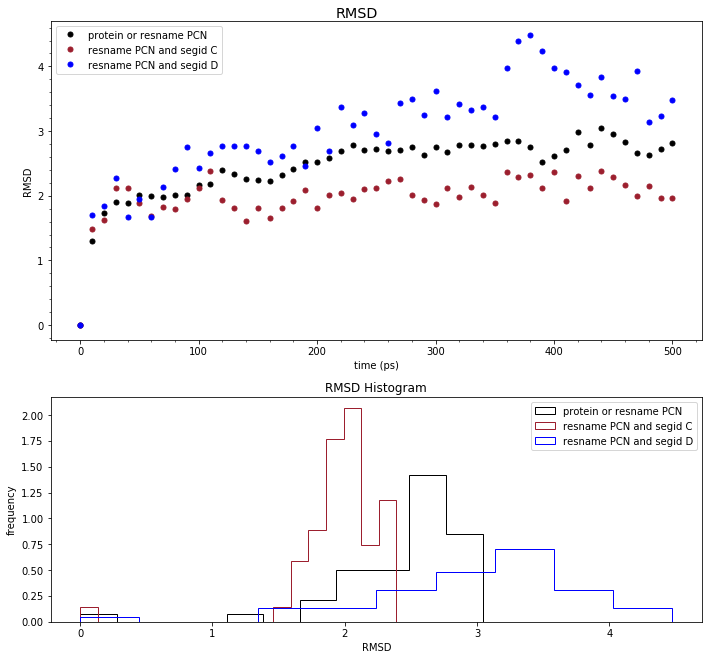

In [80]:
import matplotlib.pyplot as plt
fig = plt.figure(1)
plt.suptitle('RMSD', y = 1, fontsize = 'x-large')
gridspec.GridSpec(8,5)

plt.subplot2grid((8,5), (4,0), colspan=5, rowspan=3)
plt.hist(dRMSD["protein or resname PCN"],'auto', density = 1, color='black', histtype='step', stacked=True, label ="protein or resname PCN")
plt.hist(dRMSD["resname PCN and segid C"],'auto', density = 1, color='#9c1f2e', histtype='step', stacked=True, label ="resname PCN and segid C")
plt.hist(dRMSD["resname PCN and segid D"],'auto', density = 1, color='blue', histtype='step', stacked=True, label ="resname PCN and segid D")
plt.legend(loc="best", markerscale=10)
plt.xlabel("RMSD")
plt.ylabel("frequency")
plt.title("RMSD Histogram")

ax = plt.subplot2grid((8,5), (0,0), colspan=5, rowspan=4)
ax.plot(dRMSD['time'], dRMSD["protein or resname PCN"], '.',markersize=10, color='black', label ="protein or resname PCN")
ax.plot(dRMSD['time'], dRMSD["resname PCN and segid C"], '.',markersize=10, color='#9c1f2e', label="resname PCN and segid C")
ax.plot(dRMSD['time'], dRMSD["resname PCN and segid D"], '.',markersize=10, color='blue', label="resname PCN and segid D")
ax.set_xlabel("time (ps)")
ax.set_ylabel(r"RMSD")
plt.minorticks_on()
plt.legend(loc="best", markerscale=1)

fig.set_size_inches(w=10,h=10)
fig.tight_layout()
#plt.savefig("AcpP_HOLO_RMS.png")
plt.show()

### Radius of Gyration

In [81]:
Gyration.analysis

<function CGH_Methods.Gyration.analysis(lUniverses, lGroupSelection, lTimeOffsets=[], sSaveAs='GyrationResults')>

In [82]:
Gyration.analysis(lUniverses=[u], lGroupSelection =["protein or resname PCN", "segid A", "segid B", "segid C", "segid D"],  sSaveAs="200616_pickle_Gyration")

In [83]:
dGyration = pickle.load("200616_pickle_Gyration")

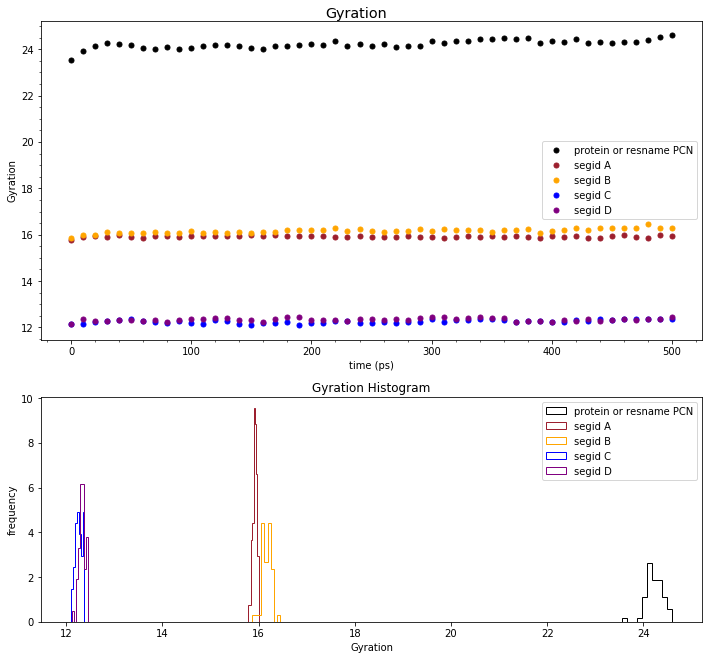

In [84]:
import matplotlib.pyplot as plt
fig = plt.figure(1)
plt.suptitle('Gyration', y = 1, fontsize = 'x-large')
gridspec.GridSpec(8,5)

plt.subplot2grid((8,5), (4,0), colspan=5, rowspan=3)
plt.hist(dGyration["protein or resname PCN"],'auto', density = 1, color='black', histtype='step', stacked=True, label ="protein or resname PCN")
plt.hist(dGyration["segid A"],'auto', density = 1, color='#9c1f2e', histtype='step', stacked=True, label ="segid A")
plt.hist(dGyration["segid B"],'auto', density = 1, color='orange', histtype='step', stacked=True, label ="segid B")
plt.hist(dGyration["segid C"],'auto', density = 1, color='blue', histtype='step', stacked=True, label ="segid C")
plt.hist(dGyration["segid D"],'auto', density = 1, color='purple', histtype='step', stacked=True, label ="segid D")
plt.legend(loc="best", markerscale=10)
plt.xlabel("Gyration")
plt.ylabel("frequency")
plt.title("Gyration Histogram")

ax = plt.subplot2grid((8,5), (0,0), colspan=5, rowspan=4)
ax.plot(dGyration['time'], dGyration["protein or resname PCN"], '.',markersize=10, color='black', label ="protein or resname PCN")
ax.plot(dGyration['time'], dGyration["segid A"], '.',markersize=10, color='#9c1f2e', label="segid A")
ax.plot(dGyration['time'], dGyration["segid B"], '.',markersize=10, color='orange', label="segid B")
ax.plot(dGyration['time'], dGyration["segid C"], '.',markersize=10, color='blue', label="segid C")
ax.plot(dGyration['time'], dGyration["segid D"], '.',markersize=10, color='purple', label="segid D")
ax.set_xlabel("time (ps)")
ax.set_ylabel(r"Gyration")
plt.minorticks_on()
plt.legend(loc="best", markerscale=1)

fig.set_size_inches(w=10,h=10)
fig.tight_layout()
#plt.savefig("AcpP_HOLO_RMS.png")
plt.show()

### Dihedral Angles

In [85]:
# look for the variable that need to be passed to the analysis function
Dihedral.analysis

<function CGH_Methods.DihedralAngles.analysis(lUniverses, lAtomSelections, lTimeOffsets=[], sSaveAs='DihedralResults')>

In [86]:
# Select groups of four atoms whose dihedral angles you want to calculate
groups= ["segid C and resname PCN and(name S44 or name C38 or name P24 or name CA)",
      "segid C and resname PCN and(name CA or name CB or name C28 or name C29)",
      "segid D and resname PCN and(name S44 or name C38 or name P24 or name CA)",
      "segid D and resname PCN and(name CA or name CB or name C28 or name C29)"]

In [87]:
# perform the analysis and save results to a pickle file with the name that you pass to sSaveAs
Dihedral.analysis(lUniverses=[u], lAtomSelections=groups, sSaveAs="200616_pickle_Dihedral")

In [88]:
# load the results from the pickle file to a dictionary object
dDihedral = pickle.load("200616_pickle_Dihedral")

In [89]:
# Look at the format of the results
dDihedral

{'segid C and resname PCN and(name S44 or name C38 or name P24 or name CA)': array([ 144.70926034,  148.72282619,  149.52557851,  128.85463242,
         161.73253554, -179.83334998,  169.46893847,  150.97284049,
         148.50799231,  149.33467685,  -82.49386363,   82.64019159,
         107.3720184 ,  130.89866533,  125.80986176,  122.36242582,
         101.99495541,  100.12232383,  137.05913113,  107.32126543,
          93.88284199,  103.08128157,   73.91326155,  123.65780382,
          47.56766472,   47.64926908,   97.24630932,  127.64189069,
         130.9617063 ,  107.077812  ,  104.71009653,   88.85685079,
         114.62452334,  105.88268982,   91.36531742,  103.39223021,
          92.70796447,   88.71288842,   75.88185807,  130.98913728,
         120.50313434,  108.58193529,  124.35489369, -161.06752933,
          72.67790576,  139.89391836,  101.85528829,  152.77571498,
         126.33939107,  102.44117155,   33.28510499]),
 'segid C and resname PCN and(name CA or name CB or n

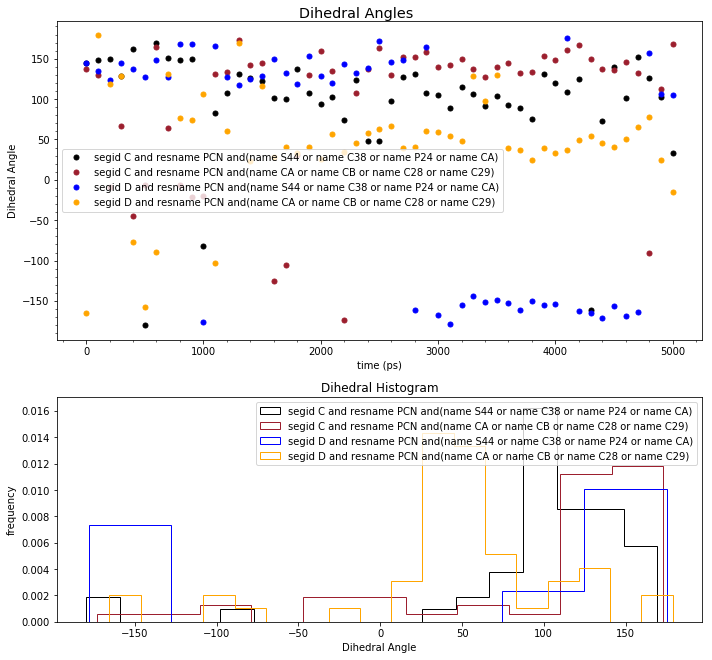

In [90]:
# Plot the results
import matplotlib.pyplot as plt
fig = plt.figure(1)
plt.suptitle('Dihedral Angles', y = 1, fontsize = 'x-large')
gridspec.GridSpec(8,5)

plt.subplot2grid((8,5), (4,0), colspan=5, rowspan=3)
plt.hist(dDihedral[groups[0]],'auto', density = 1, color='black', histtype='step', stacked=True, label =groups[0])
plt.hist(dDihedral[groups[1]],'auto', density = 1, color='#9c1f2e', histtype='step', stacked=True, label =groups[1])
plt.hist(dDihedral[groups[2]],'auto', density = 1, color='blue', histtype='step', stacked=True, label =groups[2])
plt.hist(dDihedral[groups[3]],'auto', density = 1, color='orange', histtype='step', stacked=True, label =groups[3])
plt.legend(loc="best", markerscale=10)
plt.xlabel("Dihedral Angle")
plt.ylabel("frequency")
plt.title("Dihedral Histogram")

ax = plt.subplot2grid((8,5), (0,0), colspan=5, rowspan=4)
ax.plot(dDihedral['time'], dDihedral[groups[0]], '.',markersize=10, color='black', label =groups[0])
ax.plot(dDihedral['time'], dDihedral[groups[1]], '.',markersize=10, color='#9c1f2e', label =groups[1])
ax.plot(dDihedral['time'], dDihedral[groups[2]], '.',markersize=10, color='blue', label =groups[2])
ax.plot(dDihedral['time'], dDihedral[groups[3]], '.',markersize=10, color='orange', label =groups[3])
ax.set_xlabel("time (ps)")
ax.set_ylabel(r"Dihedral Angle")
plt.minorticks_on()
plt.legend(loc="best", markerscale=1)

fig.set_size_inches(w=10,h=10)
fig.tight_layout()
#plt.savefig("Dihedral.png")
plt.show()

### SASA

In [4]:
#look at variables
SASA.analysis

<function CGH_Methods.SASA.analysis(lUniverses, lTpr, lXtc, sSurface, lOutput, lTimeOffsets=[], sSaveAs='SASAResults')>

In [5]:
SASA.analysis(lUniverses=[u], lTpr=["200616_md_0-0.5ns.tpr"], lXtc=["200616_md-center.xtc"], sSurface="protein or resname PCN", lOutput=["resname PCN and segid C", "resname PCN and segid D"], sSaveAs="200616_pickle_SASA")

In [6]:
dSASA = pickle.load("200616_pickle_SASA")

In [7]:
dSASA

{'time': array([  0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.,
        110., 120., 130., 140., 150., 160., 170., 180., 190., 200., 210.,
        220., 230., 240., 250., 260., 270., 280., 290., 300., 310., 320.,
        330., 340., 350., 360., 370., 380., 390., 400., 410., 420., 430.,
        440., 450., 460., 470., 480., 490., 500.]),
 'protein or resname PCN': array([214.825, 223.974, 223.048, 225.879, 229.225, 225.67 , 224.281,
        223.819, 223.932, 224.745, 226.859, 229.404, 226.307, 226.511,
        224.981, 224.131, 224.952, 226.79 , 226.524, 226.247, 228.273,
        227.971, 233.215, 228.042, 227.071, 224.7  , 228.407, 227.878,
        230.102, 225.038, 228.433, 229.722, 225.748, 232.983, 228.034,
        231.686, 232.242, 231.388, 230.698, 228.753, 229.734, 229.84 ,
        230.844, 228.144, 230.597, 231.808, 236.353, 232.743, 235.358,
        235.727, 232.559]),
 'resname PCN and segid C': array([0.094, 0.498, 0.62 , 0.675, 0.666, 0.588, 0.483, 0.448, 0.

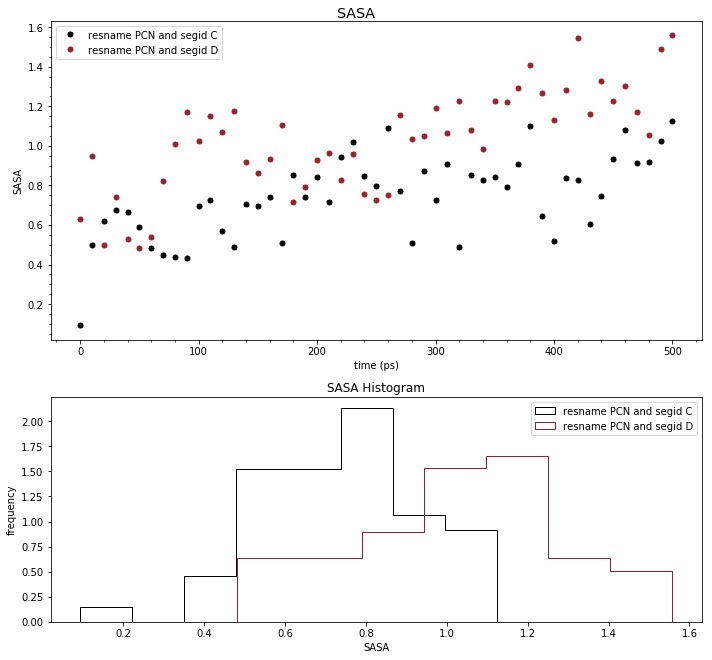

In [8]:
# Plot the results
import matplotlib.pyplot as plt
fig = plt.figure(1)
plt.suptitle('SASA', y = 1, fontsize = 'x-large')
gridspec.GridSpec(8,5)

plt.subplot2grid((8,5), (4,0), colspan=5, rowspan=3)
plt.hist(dSASA['resname PCN and segid C'],'auto', density = 1, color='black', histtype='step', stacked=True, label ='resname PCN and segid C')
plt.hist(dSASA['resname PCN and segid D'],'auto', density = 1, color='#9c1f2e', histtype='step', stacked=True, label ='resname PCN and segid D')
plt.legend(loc="best", markerscale=10)
plt.xlabel("SASA")
plt.ylabel("frequency")
plt.title("SASA Histogram")

ax = plt.subplot2grid((8,5), (0,0), colspan=5, rowspan=4)
ax.plot(dSASA['time'], dSASA['resname PCN and segid C'], '.',markersize=10, color='black', label ='resname PCN and segid C')
ax.plot(dSASA['time'], dSASA['resname PCN and segid D'], '.',markersize=10, color='#9c1f2e', label ='resname PCN and segid D')
ax.set_xlabel("time (ps)")
ax.set_ylabel(r"SASA")
plt.minorticks_on()
plt.legend(loc="best", markerscale=1)

fig.set_size_inches(w=10,h=10)
fig.tight_layout()
#plt.savefig("SASA.png")
plt.show()

### Residues Neighboring Probe

In [9]:
prox.analysis

<function CGH_Methods.prox.analysis(lUniverses, searchAtoms, radius, fileName)>

In [10]:
prox.analysis(lUniverses=[u], searchAtoms="segid C and resname PCN and (name C45 or name N46)", radius=4, fileName="200616_pickle_prox_C")

In [11]:
prox.analysis(lUniverses=[u], searchAtoms="segid D and resname PCN and (name C45 or name N46)", radius=4, fileName="200616_pickle_prox_D")

In [12]:
lProxC = pickle.load("200616_pickle_prox_C")
lProxD = pickle.load("200616_pickle_prox_D")

In [13]:
lProxC

[{'segid': 'A',
  'resname': 'VAL',
  'resid': 76,
  'count': 51,
  'countPercentage': 1.0,
  'full_string': 'A VAL 76'},
 {'segid': '',
  'resname': 'SOL',
  'resid': 15764,
  'count': 47,
  'countPercentage': 0.9215686274509803,
  'full_string': ' SOL 15764'},
 {'segid': '',
  'resname': 'SOL',
  'resid': 12842,
  'count': 44,
  'countPercentage': 0.8627450980392157,
  'full_string': ' SOL 12842'},
 {'segid': '',
  'resname': 'SOL',
  'resid': 12832,
  'count': 43,
  'countPercentage': 0.8431372549019608,
  'full_string': ' SOL 12832'},
 {'segid': 'A',
  'resname': 'MET',
  'resid': 77,
  'count': 42,
  'countPercentage': 0.8235294117647058,
  'full_string': 'A MET 77'},
 {'segid': 'A',
  'resname': 'GLY',
  'resid': 79,
  'count': 42,
  'countPercentage': 0.8235294117647058,
  'full_string': 'A GLY 79'},
 {'segid': 'A',
  'resname': 'HIS',
  'resid': 70,
  'count': 40,
  'countPercentage': 0.7843137254901961,
  'full_string': 'A HIS 70'},
 {'segid': '',
  'resname': 'SOL',
  'resid'

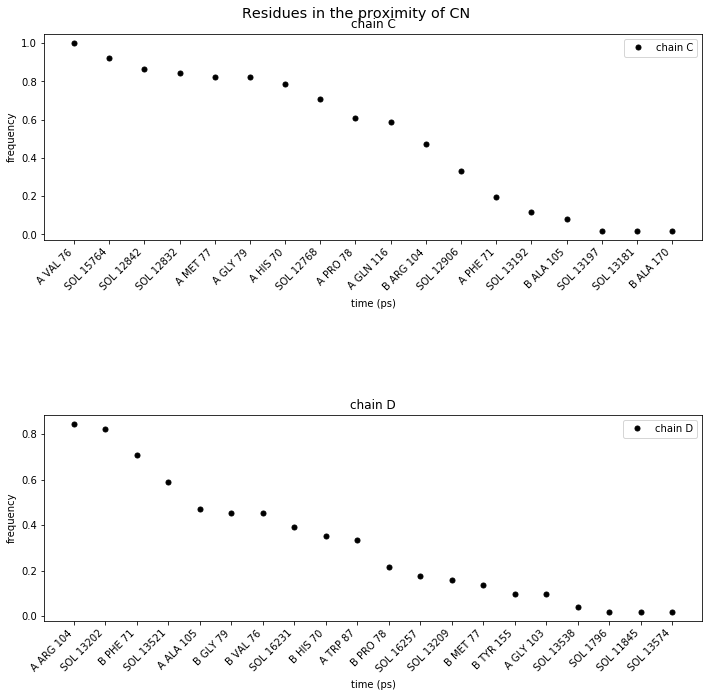

In [15]:
# Plot the results
import matplotlib.pyplot as plt
fig = plt.figure(1)
plt.suptitle('Residues in the proximity of CN', y = 1, fontsize = 'x-large')
gridspec.GridSpec(8,5)

ax = plt.subplot2grid((8,5), (0,0), colspan=5, rowspan=3)
ax.plot(prox.xval([lProxC],bChain=True), prox.yval([lProxC],bPercentage=True)[0], '.',markersize=10, color='black', label ='chain C')
ax.set_xlabel("time (ps)")
ax.set_ylabel(r"frequency")
plt.xticks(prox.xval([lProxC],bChain=True), rotation=45, horizontalalignment="right")
plt.legend(loc="best", markerscale=1)
plt.title("chain C")

ax = plt.subplot2grid((8,5), (4,0), colspan=5, rowspan=3)
ax.plot(prox.xval([lProxD],bChain=True), prox.yval([lProxD],bPercentage=True)[0], '.',markersize=10, color='black', label ='chain D')
ax.set_xlabel("time (ps)")
ax.set_ylabel(r"frequency")
plt.xticks(prox.xval([lProxD],bChain=True), rotation=45, horizontalalignment="right")
plt.legend(loc="best", markerscale=1)
plt.title("chain D")

fig.set_size_inches(w=10,h=10)
fig.tight_layout()
#plt.savefig("prox.png")
plt.show()

# Extending single run

In [39]:
!gmx convert-tpr -s 200616_md_0-0.5ns.tpr -until 1000 -o 200616_md_0.5-1ns.tpr

                :-) GROMACS - gmx convert-tpr, VERSION 5.1.2 (-:

                            GROMACS is written by:
     Emile Apol      Rossen Apostolov  Herman J.C. Berendsen    Par Bjelkmar   
 Aldert van Buuren   Rudi van Drunen     Anton Feenstra   Sebastian Fritsch 
  Gerrit Groenhof   Christoph Junghans   Anca Hamuraru    Vincent Hindriksen
 Dimitrios Karkoulis    Peter Kasson        Jiri Kraus      Carsten Kutzner  
    Per Larsson      Justin A. Lemkul   Magnus Lundborg   Pieter Meulenhoff 
   Erik Marklund      Teemu Murtola       Szilard Pall       Sander Pronk   
   Roland Schulz     Alexey Shvetsov     Michael Shirts     Alfons Sijbers  
   Peter Tieleman    Teemu Virolainen  Christian Wennberg    Maarten Wolf   
                           and the project leaders:
        Mark Abraham, Berk Hess, Erik Lindahl, and David van der Spoel

Copyright (c) 1991-2000, University of Groningen, The Netherlands.
Copyright (c) 2001-2015, The GROMACS development team at
Uppsala Univers

In [ ]:
!nohup gmx mdrun -s 200616_md_0.5-1ns.tpr -o 200616_md.trr -cpi 200616_state.cpt -cpo 200616_state.cpt

nohup: ignoring input and appending output to 'nohup.out'


## Analyis of extended run

Use the exact same steps as analysis of the initial run and simply replace the analysis files. 
- start by removing PBC
- build MDAnalysis universe
- run analysis modules

In [1]:
!(echo "chain A"; echo "q")| gmx make_ndx -f 200616_md_0.5-1ns.tpr -o 200616_chainA.ndx

                 :-) GROMACS - gmx make_ndx, VERSION 5.1.2 (-:

                            GROMACS is written by:
     Emile Apol      Rossen Apostolov  Herman J.C. Berendsen    Par Bjelkmar   
 Aldert van Buuren   Rudi van Drunen     Anton Feenstra   Sebastian Fritsch 
  Gerrit Groenhof   Christoph Junghans   Anca Hamuraru    Vincent Hindriksen
 Dimitrios Karkoulis    Peter Kasson        Jiri Kraus      Carsten Kutzner  
    Per Larsson      Justin A. Lemkul   Magnus Lundborg   Pieter Meulenhoff 
   Erik Marklund      Teemu Murtola       Szilard Pall       Sander Pronk   
   Roland Schulz     Alexey Shvetsov     Michael Shirts     Alfons Sijbers  
   Peter Tieleman    Teemu Virolainen  Christian Wennberg    Maarten Wolf   
                           and the project leaders:
        Mark Abraham, Berk Hess, Erik Lindahl, and David van der Spoel

Copyright (c) 1991-2000, University of Groningen, The Netherlands.
Copyright (c) 2001-2015, The GROMACS development team at
Uppsala Universit

In [2]:
! echo 0| gmx trjconv -f 200616_md.trr -s 200616_md_0.5-1ns.tpr -pbc mol -ur compact -o 200616_md-compact.xtc

                  :-) GROMACS - gmx trjconv, VERSION 5.1.2 (-:

                            GROMACS is written by:
     Emile Apol      Rossen Apostolov  Herman J.C. Berendsen    Par Bjelkmar   
 Aldert van Buuren   Rudi van Drunen     Anton Feenstra   Sebastian Fritsch 
  Gerrit Groenhof   Christoph Junghans   Anca Hamuraru    Vincent Hindriksen
 Dimitrios Karkoulis    Peter Kasson        Jiri Kraus      Carsten Kutzner  
    Per Larsson      Justin A. Lemkul   Magnus Lundborg   Pieter Meulenhoff 
   Erik Marklund      Teemu Murtola       Szilard Pall       Sander Pronk   
   Roland Schulz     Alexey Shvetsov     Michael Shirts     Alfons Sijbers  
   Peter Tieleman    Teemu Virolainen  Christian Wennberg    Maarten Wolf   
                           and the project leaders:
        Mark Abraham, Berk Hess, Erik Lindahl, and David van der Spoel

Copyright (c) 1991-2000, University of Groningen, The Netherlands.
Copyright (c) 2001-2015, The GROMACS development team at
Uppsala Universit

In [3]:
! (echo 18;echo 0)| gmx trjconv -f 200616_md-compact.xtc -s 200616_md_0.5-1ns.tpr -pbc mol -ur compact -center -n 200616_chainA.ndx -o 200616_md-center.xtc

                  :-) GROMACS - gmx trjconv, VERSION 5.1.2 (-:

                            GROMACS is written by:
     Emile Apol      Rossen Apostolov  Herman J.C. Berendsen    Par Bjelkmar   
 Aldert van Buuren   Rudi van Drunen     Anton Feenstra   Sebastian Fritsch 
  Gerrit Groenhof   Christoph Junghans   Anca Hamuraru    Vincent Hindriksen
 Dimitrios Karkoulis    Peter Kasson        Jiri Kraus      Carsten Kutzner  
    Per Larsson      Justin A. Lemkul   Magnus Lundborg   Pieter Meulenhoff 
   Erik Marklund      Teemu Murtola       Szilard Pall       Sander Pronk   
   Roland Schulz     Alexey Shvetsov     Michael Shirts     Alfons Sijbers  
   Peter Tieleman    Teemu Virolainen  Christian Wennberg    Maarten Wolf   
                           and the project leaders:
        Mark Abraham, Berk Hess, Erik Lindahl, and David van der Spoel

Copyright (c) 1991-2000, University of Groningen, The Netherlands.
Copyright (c) 2001-2015, The GROMACS development team at
Uppsala Universit

### Create First-frame pdb file
We need this for running the MDAnalysis software

In [4]:
! echo 0| gmx trjconv -f 200616_md-center.xtc -s 200616_md_0.5-1ns.tpr -o 200616_md-center.pdb -b 0 -e 0

                  :-) GROMACS - gmx trjconv, VERSION 5.1.2 (-:

                            GROMACS is written by:
     Emile Apol      Rossen Apostolov  Herman J.C. Berendsen    Par Bjelkmar   
 Aldert van Buuren   Rudi van Drunen     Anton Feenstra   Sebastian Fritsch 
  Gerrit Groenhof   Christoph Junghans   Anca Hamuraru    Vincent Hindriksen
 Dimitrios Karkoulis    Peter Kasson        Jiri Kraus      Carsten Kutzner  
    Per Larsson      Justin A. Lemkul   Magnus Lundborg   Pieter Meulenhoff 
   Erik Marklund      Teemu Murtola       Szilard Pall       Sander Pronk   
   Roland Schulz     Alexey Shvetsov     Michael Shirts     Alfons Sijbers  
   Peter Tieleman    Teemu Virolainen  Christian Wennberg    Maarten Wolf   
                           and the project leaders:
        Mark Abraham, Berk Hess, Erik Lindahl, and David van der Spoel

Copyright (c) 1991-2000, University of Groningen, The Netherlands.
Copyright (c) 2001-2015, The GROMACS development team at
Uppsala Universit

### Import Packages

In [5]:
import MDAnalysis
import sys
sys.path.append('../') #path to CGH_Methods directory, can be cloned from CHL github
import CGH_Methods.RMSD as RMSD
import CGH_Methods.Gyration as Gyration
import CGH_Methods.DihedralAngles as Dihedral
import CGH_Methods.SASA as SASA
import CGH_Methods.prox as prox
import CGH_Methods.pickleMethods as pickle
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
%matplotlib inline

NOTE: Some configuration directories are not set up yet: 
	/homes/cgavinhann/.gromacswrapper
	/homes/cgavinhann/.gromacswrapper/qscripts
	/homes/cgavinhann/.gromacswrapper/templates
NOTE: You can create the configuration file and directories with:
	>>> import gromacs
	>>> gromacs.config.setup()


### Build MDAnalysis universe

In [25]:
u = MDAnalysis.Universe("200616_md-center.pdb", "200616_md-center.xtc")
uRef = MDAnalysis.Universe("200616_md-center.pdb")

### RMSD

In [7]:
RMSD.analysis([u],uRef, "protein or resname PCN", ["resname PCN and segid C", "resname PCN and segid D"], sSaveAs="200616_pickle_RMSD" )

In [8]:
dRMSD = pickle.load("200616_pickle_RMSD")

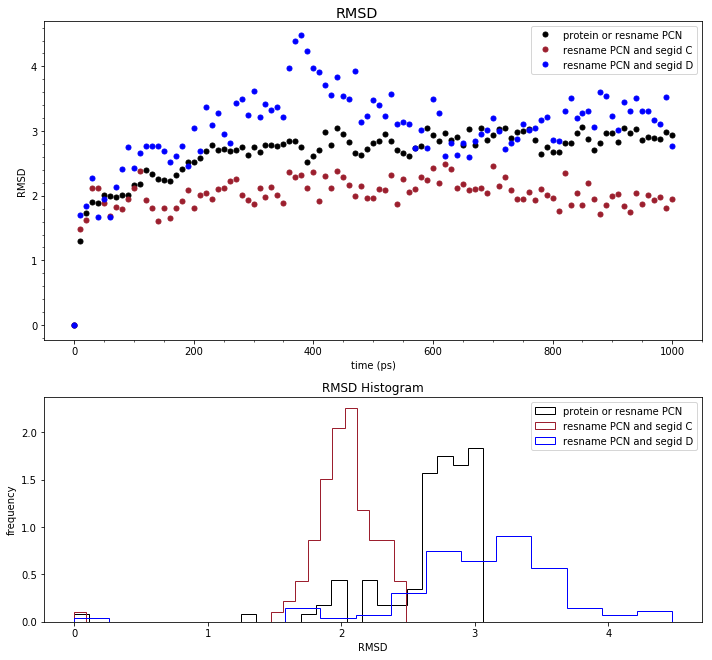

In [9]:
import matplotlib.pyplot as plt
fig = plt.figure(1)
plt.suptitle('RMSD', y = 1, fontsize = 'x-large')
gridspec.GridSpec(8,5)

plt.subplot2grid((8,5), (4,0), colspan=5, rowspan=3)
plt.hist(dRMSD["protein or resname PCN"],'auto', density = 1, color='black', histtype='step', stacked=True, label ="protein or resname PCN")
plt.hist(dRMSD["resname PCN and segid C"],'auto', density = 1, color='#9c1f2e', histtype='step', stacked=True, label ="resname PCN and segid C")
plt.hist(dRMSD["resname PCN and segid D"],'auto', density = 1, color='blue', histtype='step', stacked=True, label ="resname PCN and segid D")
plt.legend(loc="best", markerscale=10)
plt.xlabel("RMSD")
plt.ylabel("frequency")
plt.title("RMSD Histogram")

ax = plt.subplot2grid((8,5), (0,0), colspan=5, rowspan=4)
ax.plot(dRMSD['time'], dRMSD["protein or resname PCN"], '.',markersize=10, color='black', label ="protein or resname PCN")
ax.plot(dRMSD['time'], dRMSD["resname PCN and segid C"], '.',markersize=10, color='#9c1f2e', label="resname PCN and segid C")
ax.plot(dRMSD['time'], dRMSD["resname PCN and segid D"], '.',markersize=10, color='blue', label="resname PCN and segid D")
ax.set_xlabel("time (ps)")
ax.set_ylabel(r"RMSD")
plt.minorticks_on()
plt.legend(loc="best", markerscale=1)

fig.set_size_inches(w=10,h=10)
fig.tight_layout()
#plt.savefig("AcpP_HOLO_RMS.png")
plt.show()

### Radius of Gyration

In [10]:
Gyration.analysis(lUniverses=[u], lGroupSelection =["protein or resname PCN", "segid A", "segid B", "segid C", "segid D"],  sSaveAs="200616_pickle_Gyration")

In [11]:
dGyration = pickle.load("200616_pickle_Gyration")

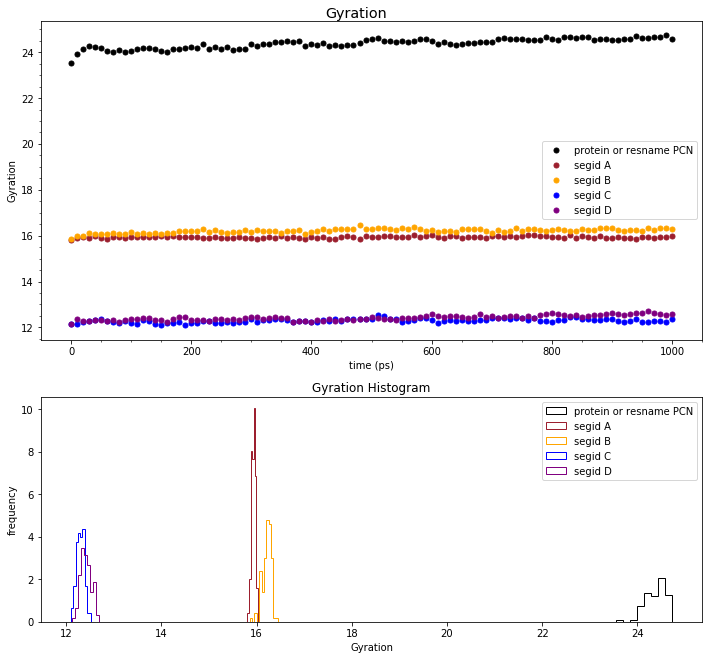

In [12]:
import matplotlib.pyplot as plt
fig = plt.figure(1)
plt.suptitle('Gyration', y = 1, fontsize = 'x-large')
gridspec.GridSpec(8,5)

plt.subplot2grid((8,5), (4,0), colspan=5, rowspan=3)
plt.hist(dGyration["protein or resname PCN"],'auto', density = 1, color='black', histtype='step', stacked=True, label ="protein or resname PCN")
plt.hist(dGyration["segid A"],'auto', density = 1, color='#9c1f2e', histtype='step', stacked=True, label ="segid A")
plt.hist(dGyration["segid B"],'auto', density = 1, color='orange', histtype='step', stacked=True, label ="segid B")
plt.hist(dGyration["segid C"],'auto', density = 1, color='blue', histtype='step', stacked=True, label ="segid C")
plt.hist(dGyration["segid D"],'auto', density = 1, color='purple', histtype='step', stacked=True, label ="segid D")
plt.legend(loc="best", markerscale=10)
plt.xlabel("Gyration")
plt.ylabel("frequency")
plt.title("Gyration Histogram")

ax = plt.subplot2grid((8,5), (0,0), colspan=5, rowspan=4)
ax.plot(dGyration['time'], dGyration["protein or resname PCN"], '.',markersize=10, color='black', label ="protein or resname PCN")
ax.plot(dGyration['time'], dGyration["segid A"], '.',markersize=10, color='#9c1f2e', label="segid A")
ax.plot(dGyration['time'], dGyration["segid B"], '.',markersize=10, color='orange', label="segid B")
ax.plot(dGyration['time'], dGyration["segid C"], '.',markersize=10, color='blue', label="segid C")
ax.plot(dGyration['time'], dGyration["segid D"], '.',markersize=10, color='purple', label="segid D")
ax.set_xlabel("time (ps)")
ax.set_ylabel(r"Gyration")
plt.minorticks_on()
plt.legend(loc="best", markerscale=1)

fig.set_size_inches(w=10,h=10)
fig.tight_layout()
#plt.savefig("AcpP_HOLO_RMS.png")
plt.show()

### Dihedral Angles

In [13]:
# Select groups of four atoms whose dihedral angles you want to calculate
groups= ["segid C and resname PCN and(name S44 or name C38 or name P24 or name CA)",
      "segid C and resname PCN and(name CA or name CB or name C28 or name C29)",
      "segid D and resname PCN and(name S44 or name C38 or name P24 or name CA)",
      "segid D and resname PCN and(name CA or name CB or name C28 or name C29)"]

In [14]:
# perform the analysis and save results to a pickle file with the name that you pass to sSaveAs
Dihedral.analysis(lUniverses=[u], lAtomSelections=groups, sSaveAs="200616_pickle_Dihedral")

In [15]:
# load the results from the pickle file to a dictionary object
dDihedral = pickle.load("200616_pickle_Dihedral")

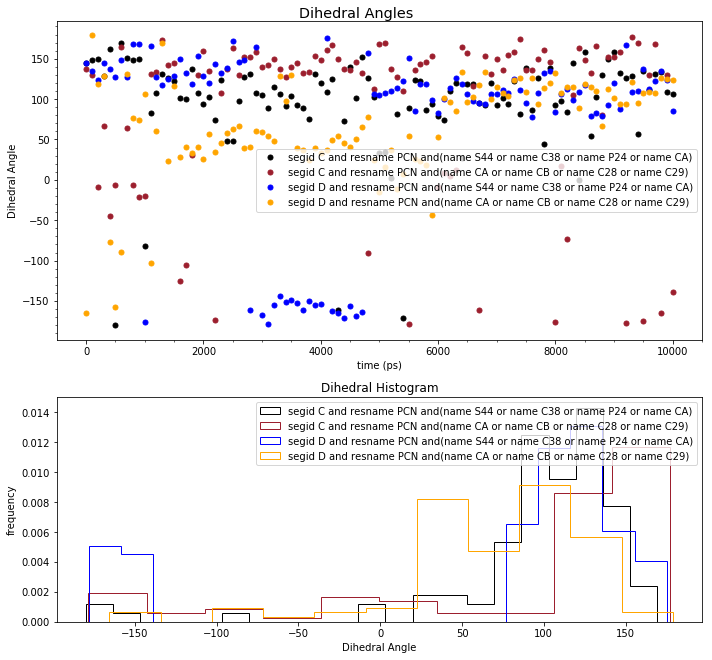

In [16]:
# Plot the results
import matplotlib.pyplot as plt
fig = plt.figure(1)
plt.suptitle('Dihedral Angles', y = 1, fontsize = 'x-large')
gridspec.GridSpec(8,5)

plt.subplot2grid((8,5), (4,0), colspan=5, rowspan=3)
plt.hist(dDihedral[groups[0]],'auto', density = 1, color='black', histtype='step', stacked=True, label =groups[0])
plt.hist(dDihedral[groups[1]],'auto', density = 1, color='#9c1f2e', histtype='step', stacked=True, label =groups[1])
plt.hist(dDihedral[groups[2]],'auto', density = 1, color='blue', histtype='step', stacked=True, label =groups[2])
plt.hist(dDihedral[groups[3]],'auto', density = 1, color='orange', histtype='step', stacked=True, label =groups[3])
plt.legend(loc="best", markerscale=10)
plt.xlabel("Dihedral Angle")
plt.ylabel("frequency")
plt.title("Dihedral Histogram")

ax = plt.subplot2grid((8,5), (0,0), colspan=5, rowspan=4)
ax.plot(dDihedral['time'], dDihedral[groups[0]], '.',markersize=10, color='black', label =groups[0])
ax.plot(dDihedral['time'], dDihedral[groups[1]], '.',markersize=10, color='#9c1f2e', label =groups[1])
ax.plot(dDihedral['time'], dDihedral[groups[2]], '.',markersize=10, color='blue', label =groups[2])
ax.plot(dDihedral['time'], dDihedral[groups[3]], '.',markersize=10, color='orange', label =groups[3])
ax.set_xlabel("time (ps)")
ax.set_ylabel(r"Dihedral Angle")
plt.minorticks_on()
plt.legend(loc="best", markerscale=1)

fig.set_size_inches(w=10,h=10)
fig.tight_layout()
#plt.savefig("Dihedral.png")
plt.show()

### SASA

In [17]:
SASA.analysis(lUniverses=[u], lTpr=["200616_md_0.5-1ns.tpr"], lXtc=["200616_md-center.xtc"], sSurface="protein or resname PCN", lOutput=["resname PCN and segid C", "resname PCN and segid D"], sSaveAs="200616_pickle_SASA")

In [18]:
dSASA = pickle.load("200616_pickle_SASA")

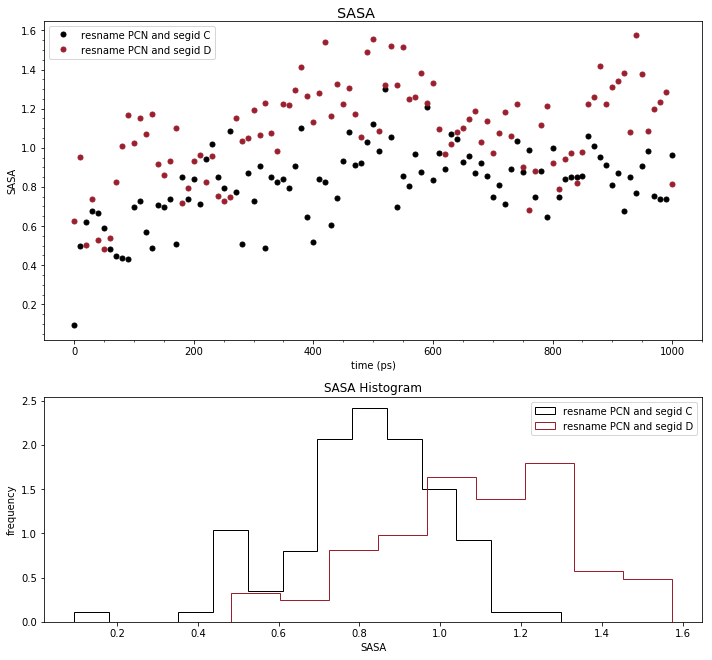

In [19]:
# Plot the results
import matplotlib.pyplot as plt
fig = plt.figure(1)
plt.suptitle('SASA', y = 1, fontsize = 'x-large')
gridspec.GridSpec(8,5)

plt.subplot2grid((8,5), (4,0), colspan=5, rowspan=3)
plt.hist(dSASA['resname PCN and segid C'],'auto', density = 1, color='black', histtype='step', stacked=True, label ='resname PCN and segid C')
plt.hist(dSASA['resname PCN and segid D'],'auto', density = 1, color='#9c1f2e', histtype='step', stacked=True, label ='resname PCN and segid D')
plt.legend(loc="best", markerscale=10)
plt.xlabel("SASA")
plt.ylabel("frequency")
plt.title("SASA Histogram")

ax = plt.subplot2grid((8,5), (0,0), colspan=5, rowspan=4)
ax.plot(dSASA['time'], dSASA['resname PCN and segid C'], '.',markersize=10, color='black', label ='resname PCN and segid C')
ax.plot(dSASA['time'], dSASA['resname PCN and segid D'], '.',markersize=10, color='#9c1f2e', label ='resname PCN and segid D')
ax.set_xlabel("time (ps)")
ax.set_ylabel(r"SASA")
plt.minorticks_on()
plt.legend(loc="best", markerscale=1)

fig.set_size_inches(w=10,h=10)
fig.tight_layout()
#plt.savefig("SASA.png")
plt.show()

### Residues Neighboring Probe

In [20]:
prox.analysis(lUniverses=[u], searchAtoms="segid C and resname PCN and (name C45 or name N46)", radius=4, fileName="200616_pickle_prox_C")

In [21]:
prox.analysis(lUniverses=[u], searchAtoms="segid D and resname PCN and (name C45 or name N46)", radius=4, fileName="200616_pickle_prox_D")

In [22]:
lProxC = pickle.load("200616_pickle_prox_C")
lProxD = pickle.load("200616_pickle_prox_D")

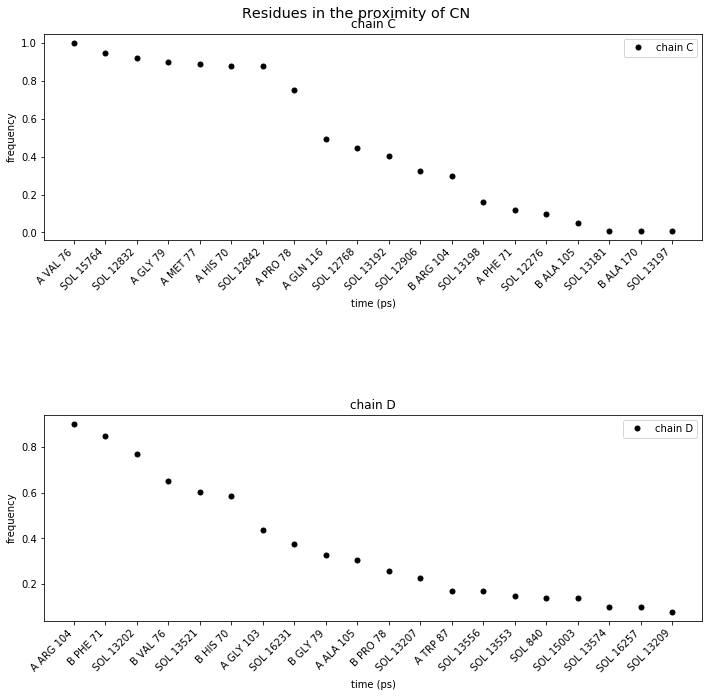

In [23]:
# Plot the results
import matplotlib.pyplot as plt
fig = plt.figure(1)
plt.suptitle('Residues in the proximity of CN', y = 1, fontsize = 'x-large')
gridspec.GridSpec(8,5)

ax = plt.subplot2grid((8,5), (0,0), colspan=5, rowspan=3)
ax.plot(prox.xval([lProxC],bChain=True), prox.yval([lProxC],bPercentage=True)[0], '.',markersize=10, color='black', label ='chain C')
ax.set_xlabel("time (ps)")
ax.set_ylabel(r"frequency")
plt.xticks(prox.xval([lProxC],bChain=True), rotation=45, horizontalalignment="right")
plt.legend(loc="best", markerscale=1)
plt.title("chain C")

ax = plt.subplot2grid((8,5), (4,0), colspan=5, rowspan=3)
ax.plot(prox.xval([lProxD],bChain=True), prox.yval([lProxD],bPercentage=True)[0], '.',markersize=10, color='black', label ='chain D')
ax.set_xlabel("time (ps)")
ax.set_ylabel(r"frequency")
plt.xticks(prox.xval([lProxD],bChain=True), rotation=45, horizontalalignment="right")
plt.legend(loc="best", markerscale=1)
plt.title("chain D")

fig.set_size_inches(w=10,h=10)
fig.tight_layout()
#plt.savefig("prox.png")
plt.show()

# Duplicates of the Run

Duplicates of a run are independent MD production runs that are totally separate from the original run. They have the exact same structure as the original and begin from one of original runs frames. The steps below will run two duplicate jobs that begin at random frames of the original run.

- random generator
- save as pickle (time offsets)
- run wrapper trjconv for both and put in new directories
- copy over files
- run jobs
- analysis from here

In [51]:
#randomly generate frame times and save
import random
lRandomFrames = []
for x in range(2): #2 random frames
    lRandomFrames.append(random.choice(range(0,1010, 10))) #random choice from list of integers from 0-1000 at increments of 10
pickle.save(lRandomFrames, "200616_pickle_randomFrames")

In [55]:
#change permissions for saved file of frames so it can';t be changed once its written
! chmod 444 200616_pickle_randomFrames 

In [3]:
# If accessing frames list again, run this
lRandomFrames=pickle.load("200616_pickle_randomFrames")

In [4]:
lRandomFrames

[110, 490]

## Generate random frames

In [61]:
! mkdir 200616.2
! mkdir 200616.3

In [27]:
import gromacs.tools as tools
for x in range(len(lRandomFrames)):
    out="200616." + str(x+2) + "/200616." + str(x+2) + "_0ns.gro"
    gro = tools.Trjconv(s="200616_md_0-0.5ns.tpr", f="200616_md.trr", o=out, b=lRandomFrames[x], e=lRandomFrames[x], input=('system'))
    gro.run()

In [30]:
# all topology files
! cp 200616_topol.top 200616.2/
! cp 200616_topol.top 200616.3/
# .ff
! cp -r charmm36-190509.ff/ 200616.2/
! cp -r charmm36-190509.ff/ 200616.3/
# .dat
! cp residuetypes.dat 200616.2/
! cp residuetypes.dat 200616.3/
# .mdp
! cp 200616_md.mdp 200616.2/200616.2_md.mdp
! cp 200616_md.mdp 200616.3/200616.3_md.mdp
# .itp
! cp *.itp 200616.2/
! cp *.itp 200616.3/

## Production runs

In [31]:
!gmx grompp -f 200616.2/200616.2_md.mdp -c 200616.2/200616.2_0ns.gro -p 200616.2/200616_topol.top -o 200616.2/200616.2_md_0-0.5ns.tpr

                  :-) GROMACS - gmx grompp, VERSION 5.1.2 (-:

                            GROMACS is written by:
     Emile Apol      Rossen Apostolov  Herman J.C. Berendsen    Par Bjelkmar   
 Aldert van Buuren   Rudi van Drunen     Anton Feenstra   Sebastian Fritsch 
  Gerrit Groenhof   Christoph Junghans   Anca Hamuraru    Vincent Hindriksen
 Dimitrios Karkoulis    Peter Kasson        Jiri Kraus      Carsten Kutzner  
    Per Larsson      Justin A. Lemkul   Magnus Lundborg   Pieter Meulenhoff 
   Erik Marklund      Teemu Murtola       Szilard Pall       Sander Pronk   
   Roland Schulz     Alexey Shvetsov     Michael Shirts     Alfons Sijbers  
   Peter Tieleman    Teemu Virolainen  Christian Wennberg    Maarten Wolf   
                           and the project leaders:
        Mark Abraham, Berk Hess, Erik Lindahl, and David van der Spoel

Copyright (c) 1991-2000, University of Groningen, The Netherlands.
Copyright (c) 2001-2015, The GROMACS development team at
Uppsala University

In [ ]:
!nohup gmx mdrun -s 200616.2/200616.2_md_0-0.5ns.tpr -o 200616.2/200616.2_md.trr -cpo 200616.2/200616.2_state.cpt

In [32]:
!gmx grompp -f 200616.3/200616.3_md.mdp -c 200616.3/200616.3_0ns.gro -p 200616.3/200616_topol.top -o 200616.3/200616.3_md_0-0.5ns.tpr

                  :-) GROMACS - gmx grompp, VERSION 5.1.2 (-:

                            GROMACS is written by:
     Emile Apol      Rossen Apostolov  Herman J.C. Berendsen    Par Bjelkmar   
 Aldert van Buuren   Rudi van Drunen     Anton Feenstra   Sebastian Fritsch 
  Gerrit Groenhof   Christoph Junghans   Anca Hamuraru    Vincent Hindriksen
 Dimitrios Karkoulis    Peter Kasson        Jiri Kraus      Carsten Kutzner  
    Per Larsson      Justin A. Lemkul   Magnus Lundborg   Pieter Meulenhoff 
   Erik Marklund      Teemu Murtola       Szilard Pall       Sander Pronk   
   Roland Schulz     Alexey Shvetsov     Michael Shirts     Alfons Sijbers  
   Peter Tieleman    Teemu Virolainen  Christian Wennberg    Maarten Wolf   
                           and the project leaders:
        Mark Abraham, Berk Hess, Erik Lindahl, and David van der Spoel

Copyright (c) 1991-2000, University of Groningen, The Netherlands.
Copyright (c) 2001-2015, The GROMACS development team at
Uppsala University

In [ ]:
!nohup gmx mdrun -s 200616.3/200616.3_md_0-0.5ns.tpr -o 200616.3/200616.3_md.trr -cpo 200616.3/200616.3_state.cpt

## Analysis of duplicate runs

In [5]:
! echo 0| gmx trjconv -f 200616.2/200616.2_md.trr -s 200616.2/200616.2_md_0-0.5ns.tpr -pbc mol -ur compact -o 200616.2/200616.2_md-compact.xtc

                  :-) GROMACS - gmx trjconv, VERSION 5.1.2 (-:

                            GROMACS is written by:
     Emile Apol      Rossen Apostolov  Herman J.C. Berendsen    Par Bjelkmar   
 Aldert van Buuren   Rudi van Drunen     Anton Feenstra   Sebastian Fritsch 
  Gerrit Groenhof   Christoph Junghans   Anca Hamuraru    Vincent Hindriksen
 Dimitrios Karkoulis    Peter Kasson        Jiri Kraus      Carsten Kutzner  
    Per Larsson      Justin A. Lemkul   Magnus Lundborg   Pieter Meulenhoff 
   Erik Marklund      Teemu Murtola       Szilard Pall       Sander Pronk   
   Roland Schulz     Alexey Shvetsov     Michael Shirts     Alfons Sijbers  
   Peter Tieleman    Teemu Virolainen  Christian Wennberg    Maarten Wolf   
                           and the project leaders:
        Mark Abraham, Berk Hess, Erik Lindahl, and David van der Spoel

Copyright (c) 1991-2000, University of Groningen, The Netherlands.
Copyright (c) 2001-2015, The GROMACS development team at
Uppsala Universit

In [6]:
! (echo 18;echo 0)| gmx trjconv -f 200616.2/200616.2_md-compact.xtc -s 200616.2/200616.2_md_0-0.5ns.tpr -pbc mol -ur compact -center -n 200616_chainA.ndx -o 200616.2/200616.2_md-center.xtc

                  :-) GROMACS - gmx trjconv, VERSION 5.1.2 (-:

                            GROMACS is written by:
     Emile Apol      Rossen Apostolov  Herman J.C. Berendsen    Par Bjelkmar   
 Aldert van Buuren   Rudi van Drunen     Anton Feenstra   Sebastian Fritsch 
  Gerrit Groenhof   Christoph Junghans   Anca Hamuraru    Vincent Hindriksen
 Dimitrios Karkoulis    Peter Kasson        Jiri Kraus      Carsten Kutzner  
    Per Larsson      Justin A. Lemkul   Magnus Lundborg   Pieter Meulenhoff 
   Erik Marklund      Teemu Murtola       Szilard Pall       Sander Pronk   
   Roland Schulz     Alexey Shvetsov     Michael Shirts     Alfons Sijbers  
   Peter Tieleman    Teemu Virolainen  Christian Wennberg    Maarten Wolf   
                           and the project leaders:
        Mark Abraham, Berk Hess, Erik Lindahl, and David van der Spoel

Copyright (c) 1991-2000, University of Groningen, The Netherlands.
Copyright (c) 2001-2015, The GROMACS development team at
Uppsala Universit

In [7]:
! echo 0| gmx trjconv -f 200616.3/200616.3_md.trr -s 200616.3/200616.3_md_0-0.5ns.tpr -pbc mol -ur compact -o 200616.3/200616.3_md-compact.xtc

                  :-) GROMACS - gmx trjconv, VERSION 5.1.2 (-:

                            GROMACS is written by:
     Emile Apol      Rossen Apostolov  Herman J.C. Berendsen    Par Bjelkmar   
 Aldert van Buuren   Rudi van Drunen     Anton Feenstra   Sebastian Fritsch 
  Gerrit Groenhof   Christoph Junghans   Anca Hamuraru    Vincent Hindriksen
 Dimitrios Karkoulis    Peter Kasson        Jiri Kraus      Carsten Kutzner  
    Per Larsson      Justin A. Lemkul   Magnus Lundborg   Pieter Meulenhoff 
   Erik Marklund      Teemu Murtola       Szilard Pall       Sander Pronk   
   Roland Schulz     Alexey Shvetsov     Michael Shirts     Alfons Sijbers  
   Peter Tieleman    Teemu Virolainen  Christian Wennberg    Maarten Wolf   
                           and the project leaders:
        Mark Abraham, Berk Hess, Erik Lindahl, and David van der Spoel

Copyright (c) 1991-2000, University of Groningen, The Netherlands.
Copyright (c) 2001-2015, The GROMACS development team at
Uppsala Universit

In [8]:
! (echo 18;echo 0)| gmx trjconv -f 200616.3/200616.3_md-compact.xtc -s 200616.3/200616.3_md_0-0.5ns.tpr -pbc mol -ur compact -center -n 200616_chainA.ndx -o 200616.3/200616.3_md-center.xtc

                  :-) GROMACS - gmx trjconv, VERSION 5.1.2 (-:

                            GROMACS is written by:
     Emile Apol      Rossen Apostolov  Herman J.C. Berendsen    Par Bjelkmar   
 Aldert van Buuren   Rudi van Drunen     Anton Feenstra   Sebastian Fritsch 
  Gerrit Groenhof   Christoph Junghans   Anca Hamuraru    Vincent Hindriksen
 Dimitrios Karkoulis    Peter Kasson        Jiri Kraus      Carsten Kutzner  
    Per Larsson      Justin A. Lemkul   Magnus Lundborg   Pieter Meulenhoff 
   Erik Marklund      Teemu Murtola       Szilard Pall       Sander Pronk   
   Roland Schulz     Alexey Shvetsov     Michael Shirts     Alfons Sijbers  
   Peter Tieleman    Teemu Virolainen  Christian Wennberg    Maarten Wolf   
                           and the project leaders:
        Mark Abraham, Berk Hess, Erik Lindahl, and David van der Spoel

Copyright (c) 1991-2000, University of Groningen, The Netherlands.
Copyright (c) 2001-2015, The GROMACS development team at
Uppsala Universit

### Create First-frame pdb file
We need this for running the MDAnalysis software

In [9]:
! echo 0| gmx trjconv -f 200616.2/200616.2_md-center.xtc -s 200616.2/200616.2_md_0-0.5ns.tpr -o 200616.2/200616.2_md-center.pdb -b 0 -e 0

                  :-) GROMACS - gmx trjconv, VERSION 5.1.2 (-:

                            GROMACS is written by:
     Emile Apol      Rossen Apostolov  Herman J.C. Berendsen    Par Bjelkmar   
 Aldert van Buuren   Rudi van Drunen     Anton Feenstra   Sebastian Fritsch 
  Gerrit Groenhof   Christoph Junghans   Anca Hamuraru    Vincent Hindriksen
 Dimitrios Karkoulis    Peter Kasson        Jiri Kraus      Carsten Kutzner  
    Per Larsson      Justin A. Lemkul   Magnus Lundborg   Pieter Meulenhoff 
   Erik Marklund      Teemu Murtola       Szilard Pall       Sander Pronk   
   Roland Schulz     Alexey Shvetsov     Michael Shirts     Alfons Sijbers  
   Peter Tieleman    Teemu Virolainen  Christian Wennberg    Maarten Wolf   
                           and the project leaders:
        Mark Abraham, Berk Hess, Erik Lindahl, and David van der Spoel

Copyright (c) 1991-2000, University of Groningen, The Netherlands.
Copyright (c) 2001-2015, The GROMACS development team at
Uppsala Universit

In [10]:
! echo 0| gmx trjconv -f 200616.3/200616.3_md-center.xtc -s 200616.3/200616.3_md_0-0.5ns.tpr -o 200616.3/200616.3_md-center.pdb -b 0 -e 0

                  :-) GROMACS - gmx trjconv, VERSION 5.1.2 (-:

                            GROMACS is written by:
     Emile Apol      Rossen Apostolov  Herman J.C. Berendsen    Par Bjelkmar   
 Aldert van Buuren   Rudi van Drunen     Anton Feenstra   Sebastian Fritsch 
  Gerrit Groenhof   Christoph Junghans   Anca Hamuraru    Vincent Hindriksen
 Dimitrios Karkoulis    Peter Kasson        Jiri Kraus      Carsten Kutzner  
    Per Larsson      Justin A. Lemkul   Magnus Lundborg   Pieter Meulenhoff 
   Erik Marklund      Teemu Murtola       Szilard Pall       Sander Pronk   
   Roland Schulz     Alexey Shvetsov     Michael Shirts     Alfons Sijbers  
   Peter Tieleman    Teemu Virolainen  Christian Wennberg    Maarten Wolf   
                           and the project leaders:
        Mark Abraham, Berk Hess, Erik Lindahl, and David van der Spoel

Copyright (c) 1991-2000, University of Groningen, The Netherlands.
Copyright (c) 2001-2015, The GROMACS development team at
Uppsala Universit

### Import Packages

In [1]:
import MDAnalysis
import sys
sys.path.append('../') #path to CGH_Methods directory, can be cloned from CHL github
import CGH_Methods.RMSD as RMSD
import CGH_Methods.Gyration as Gyration
import CGH_Methods.DihedralAngles as Dihedral
import CGH_Methods.SASA as SASA
import CGH_Methods.prox as prox
import CGH_Methods.pickleMethods as pickle
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
%matplotlib inline

NOTE: Some configuration directories are not set up yet: 
	/homes/cgavinhann/.gromacswrapper
	/homes/cgavinhann/.gromacswrapper/qscripts
	/homes/cgavinhann/.gromacswrapper/templates
NOTE: You can create the configuration file and directories with:
	>>> import gromacs
	>>> gromacs.config.setup()


### Build MDAnalysis universe

In [2]:
u1 = MDAnalysis.Universe("200616_md-center.pdb", "200616_md-center.xtc")
u2 = MDAnalysis.Universe("200616.2/200616.2_md-center.pdb", "200616.2/200616.2_md-center.xtc")
u3 = MDAnalysis.Universe("200616.3/200616.3_md-center.pdb", "200616.3/200616.3_md-center.xtc")
uRef = MDAnalysis.Universe("200616_md-center.pdb")

### RMSD

In [13]:
RMSD.analysis

<function CGH_Methods.RMSD.analysis(lUniverses, uRef, sSelection, lGroups, sSaveAs='RMSDResults', lTimeOffsets=[])>

In [16]:
RMSD.analysis([u1, u2, u3],uRef, "protein or resname PCN", ["resname PCN and segid C", "resname PCN and segid D"], sSaveAs="200616_pickle_RMSD", lTimeOffsets=lRandomFrames )

In [17]:
dRMSD = pickle.load("200616_pickle_RMSD")

In [34]:
dRMSD['time'][202]

990.0

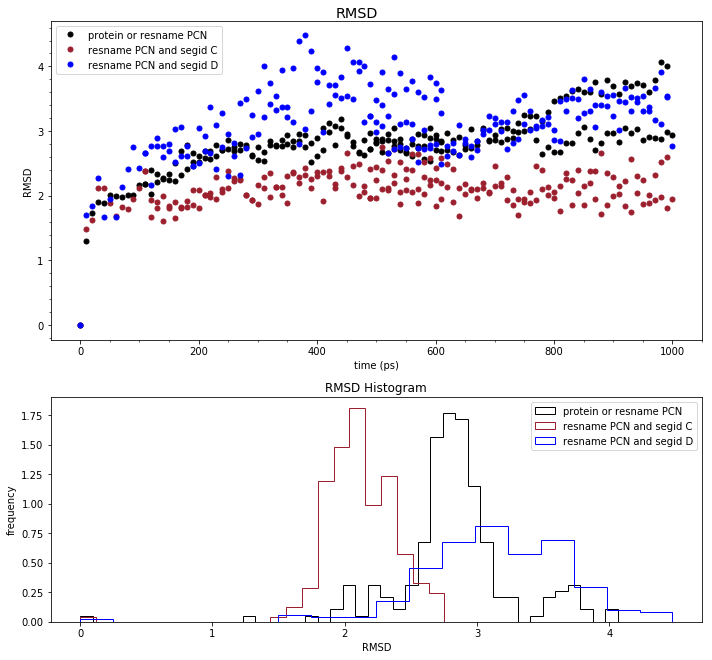

In [19]:
import matplotlib.pyplot as plt
fig = plt.figure(1)
plt.suptitle('RMSD', y = 1, fontsize = 'x-large')
gridspec.GridSpec(8,5)

plt.subplot2grid((8,5), (4,0), colspan=5, rowspan=3)
plt.hist(dRMSD["protein or resname PCN"],'auto', density = 1, color='black', histtype='step', stacked=True, label ="protein or resname PCN")
plt.hist(dRMSD["resname PCN and segid C"],'auto', density = 1, color='#9c1f2e', histtype='step', stacked=True, label ="resname PCN and segid C")
plt.hist(dRMSD["resname PCN and segid D"],'auto', density = 1, color='blue', histtype='step', stacked=True, label ="resname PCN and segid D")
plt.legend(loc="best", markerscale=10)
plt.xlabel("RMSD")
plt.ylabel("frequency")
plt.title("RMSD Histogram")

ax = plt.subplot2grid((8,5), (0,0), colspan=5, rowspan=4)
ax.plot(dRMSD['time'], dRMSD["protein or resname PCN"], '.',markersize=10, color='black', label ="protein or resname PCN")
ax.plot(dRMSD['time'], dRMSD["resname PCN and segid C"], '.',markersize=10, color='#9c1f2e', label="resname PCN and segid C")
ax.plot(dRMSD['time'], dRMSD["resname PCN and segid D"], '.',markersize=10, color='blue', label="resname PCN and segid D")
ax.set_xlabel("time (ps)")
ax.set_ylabel(r"RMSD")
plt.minorticks_on()
plt.legend(loc="best", markerscale=1)

fig.set_size_inches(w=10,h=10)
fig.tight_layout()
#plt.savefig("AcpP_HOLO_RMS.png")
plt.show()

### Radius of Gyration

In [23]:
Gyration.analysis

<function CGH_Methods.Gyration.analysis(lUniverses, lGroupSelection, lTimeOffsets=[], sSaveAs='GyrationResults')>

In [24]:
Gyration.analysis(lUniverses=[u1, u2, u3], lGroupSelection =["protein or resname PCN", "segid A", "segid B", "segid C", "segid D"],  sSaveAs="200616_pickle_Gyration", lTimeOffsets=lRandomFrames)

In [25]:
dGyration = pickle.load("200616_pickle_Gyration")

In [36]:
dGyration

{'time': array([   0.,   10.,   20.,   30.,   40.,   50.,   60.,   70.,   80.,
          90.,  100.,  110.,  120.,  130.,  140.,  150.,  160.,  170.,
         180.,  190.,  200.,  210.,  220.,  230.,  240.,  250.,  260.,
         270.,  280.,  290.,  300.,  310.,  320.,  330.,  340.,  350.,
         360.,  370.,  380.,  390.,  400.,  410.,  420.,  430.,  440.,
         450.,  460.,  470.,  480.,  490.,  500.,  510.,  520.,  530.,
         540.,  550.,  560.,  570.,  580.,  590.,  600.,  610.,  620.,
         630.,  640.,  650.,  660.,  670.,  680.,  690.,  700.,  710.,
         720.,  730.,  740.,  750.,  760.,  770.,  780.,  790.,  800.,
         810.,  820.,  830.,  840.,  850.,  860.,  870.,  880.,  890.,
         900.,  910.,  920.,  930.,  940.,  950.,  960.,  970.,  980.,
         990., 1000.,  110.,  120.,  130.,  140.,  150.,  160.,  170.,
         180.,  190.,  200.,  210.,  220.,  230.,  240.,  250.,  260.,
         270.,  280.,  290.,  300.,  310.,  320.,  330.,  340.,  350.

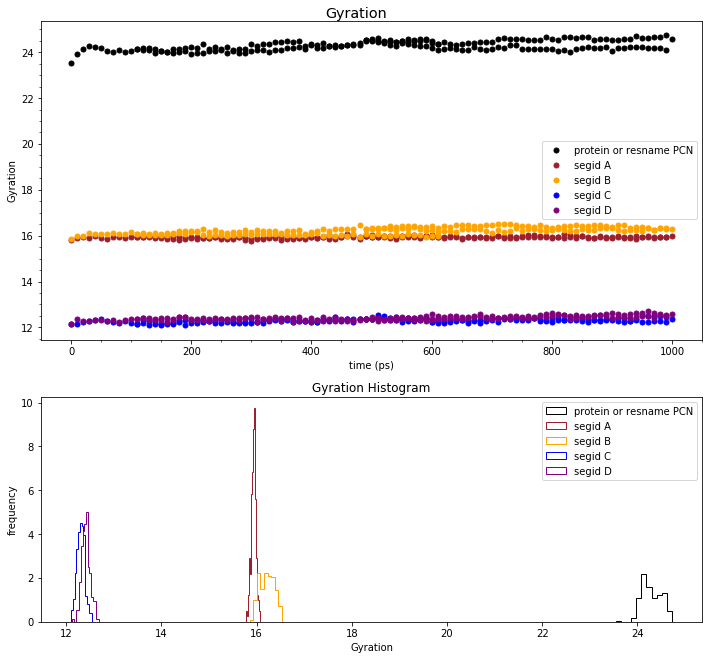

In [26]:
import matplotlib.pyplot as plt
fig = plt.figure(1)
plt.suptitle('Gyration', y = 1, fontsize = 'x-large')
gridspec.GridSpec(8,5)

plt.subplot2grid((8,5), (4,0), colspan=5, rowspan=3)
plt.hist(dGyration["protein or resname PCN"],'auto', density = 1, color='black', histtype='step', stacked=True, label ="protein or resname PCN")
plt.hist(dGyration["segid A"],'auto', density = 1, color='#9c1f2e', histtype='step', stacked=True, label ="segid A")
plt.hist(dGyration["segid B"],'auto', density = 1, color='orange', histtype='step', stacked=True, label ="segid B")
plt.hist(dGyration["segid C"],'auto', density = 1, color='blue', histtype='step', stacked=True, label ="segid C")
plt.hist(dGyration["segid D"],'auto', density = 1, color='purple', histtype='step', stacked=True, label ="segid D")
plt.legend(loc="best", markerscale=10)
plt.xlabel("Gyration")
plt.ylabel("frequency")
plt.title("Gyration Histogram")

ax = plt.subplot2grid((8,5), (0,0), colspan=5, rowspan=4)
ax.plot(dGyration['time'], dGyration["protein or resname PCN"], '.',markersize=10, color='black', label ="protein or resname PCN")
ax.plot(dGyration['time'], dGyration["segid A"], '.',markersize=10, color='#9c1f2e', label="segid A")
ax.plot(dGyration['time'], dGyration["segid B"], '.',markersize=10, color='orange', label="segid B")
ax.plot(dGyration['time'], dGyration["segid C"], '.',markersize=10, color='blue', label="segid C")
ax.plot(dGyration['time'], dGyration["segid D"], '.',markersize=10, color='purple', label="segid D")
ax.set_xlabel("time (ps)")
ax.set_ylabel(r"Gyration")
plt.minorticks_on()
plt.legend(loc="best", markerscale=1)

fig.set_size_inches(w=10,h=10)
fig.tight_layout()
#plt.savefig("AcpP_HOLO_RMS.png")
plt.show()

### Dihedral Angles

In [5]:
# look for the variable that need to be passed to the analysis function
Dihedral.analysis

<function CGH_Methods.DihedralAngles.analysis(lUniverses, lAtomSelections, lTimeOffsets=[], sSaveAs='DihedralResults')>

In [6]:
# Select groups of four atoms whose dihedral angles you want to calculate
groups= ["segid C and resname PCN and(name S44 or name C38 or name P24 or name CA)",
      "segid C and resname PCN and(name CA or name CB or name C28 or name C29)",
      "segid D and resname PCN and(name S44 or name C38 or name P24 or name CA)",
      "segid D and resname PCN and(name CA or name CB or name C28 or name C29)"]

In [7]:
# perform the analysis and save results to a pickle file with the name that you pass to sSaveAs
Dihedral.analysis(lUniverses=[u1, u2, u3], lAtomSelections=groups, sSaveAs="200616_pickle_Dihedral", lTimeOffsets=lRandomFrames)

In [8]:
# load the results from the pickle file to a dictionary object
dDihedral = pickle.load("200616_pickle_Dihedral")

In [9]:
# Look at the format of the results
dDihedral

{'segid C and resname PCN and(name S44 or name C38 or name P24 or name CA)': array([ 1.44709260e+02,  1.48722826e+02,  1.49525579e+02,  1.28854632e+02,
         1.61732536e+02, -1.79833350e+02,  1.69468938e+02,  1.50972840e+02,
         1.48507992e+02,  1.49334677e+02, -8.24938636e+01,  8.26401916e+01,
         1.07372018e+02,  1.30898665e+02,  1.25809862e+02,  1.22362426e+02,
         1.01994955e+02,  1.00122324e+02,  1.37059131e+02,  1.07321265e+02,
         9.38828420e+01,  1.03081282e+02,  7.39132616e+01,  1.23657804e+02,
         4.75676647e+01,  4.76492691e+01,  9.72463093e+01,  1.27641891e+02,
         1.30961706e+02,  1.07077812e+02,  1.04710097e+02,  8.88568508e+01,
         1.14624523e+02,  1.05882690e+02,  9.13653174e+01,  1.03392230e+02,
         9.27079645e+01,  8.87128884e+01,  7.58818581e+01,  1.30989137e+02,
         1.20503134e+02,  1.08581935e+02,  1.24354894e+02, -1.61067529e+02,
         7.26779058e+01,  1.39893918e+02,  1.01855288e+02,  1.52775715e+02,
         1.2

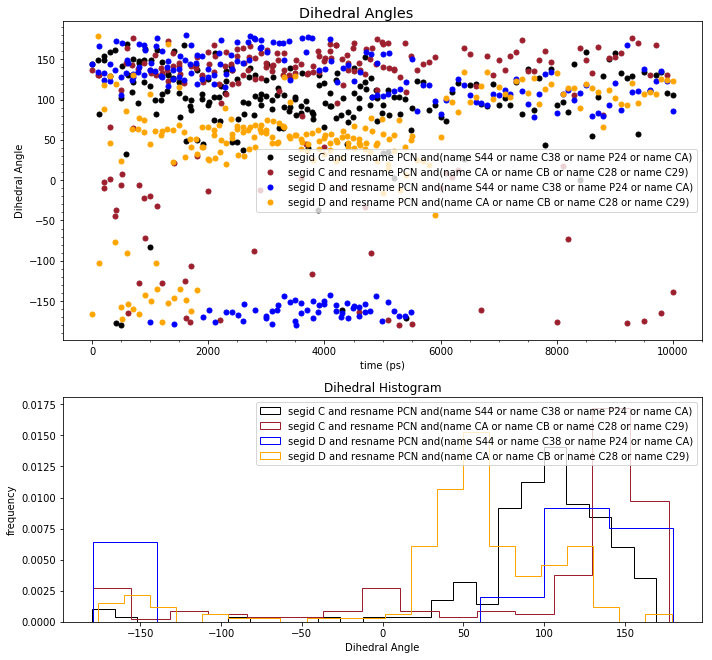

In [32]:
# Plot the results
import matplotlib.pyplot as plt
fig = plt.figure(1)
plt.suptitle('Dihedral Angles', y = 1, fontsize = 'x-large')
gridspec.GridSpec(8,5)

plt.subplot2grid((8,5), (4,0), colspan=5, rowspan=3)
plt.hist(dDihedral[groups[0]],'auto', density = 1, color='black', histtype='step', stacked=True, label =groups[0])
plt.hist(dDihedral[groups[1]],'auto', density = 1, color='#9c1f2e', histtype='step', stacked=True, label =groups[1])
plt.hist(dDihedral[groups[2]],'auto', density = 1, color='blue', histtype='step', stacked=True, label =groups[2])
plt.hist(dDihedral[groups[3]],'auto', density = 1, color='orange', histtype='step', stacked=True, label =groups[3])
plt.legend(loc="best", markerscale=10)
plt.xlabel("Dihedral Angle")
plt.ylabel("frequency")
plt.title("Dihedral Histogram")

ax = plt.subplot2grid((8,5), (0,0), colspan=5, rowspan=4)
ax.plot(dDihedral['time'], dDihedral[groups[0]], '.',markersize=10, color='black', label =groups[0])
ax.plot(dDihedral['time'], dDihedral[groups[1]], '.',markersize=10, color='#9c1f2e', label =groups[1])
ax.plot(dDihedral['time'], dDihedral[groups[2]], '.',markersize=10, color='blue', label =groups[2])
ax.plot(dDihedral['time'], dDihedral[groups[3]], '.',markersize=10, color='orange', label =groups[3])
ax.set_xlabel("time (ps)")
ax.set_ylabel(r"Dihedral Angle")
plt.minorticks_on()
plt.legend(loc="best", markerscale=1)

fig.set_size_inches(w=10,h=10)
fig.tight_layout()
#plt.savefig("Dihedral.png")
plt.show()

### SASA

In [10]:
#look at variables
SASA.analysis

<function CGH_Methods.SASA.analysis(lUniverses, lTpr, lXtc, sSurface, lOutput, lTimeOffsets=[], sSaveAs='SASAResults')>

In [11]:
SASA.analysis(lUniverses=[u1, u2, u3],
              lTpr=["200616_md_0.5-1ns.tpr", "200616.2/200616.2_md_0-0.5ns.tpr", "200616.3/200616.3_md_0-0.5ns.tpr"],
              lXtc=["200616_md-center.xtc", "200616.2/200616.2_md-center.xtc", "200616.3/200616.3_md-center.xtc"], 
              sSurface="protein or resname PCN", 
              lOutput=["resname PCN and segid C", "resname PCN and segid D"],
              sSaveAs="200616_pickle_SASA", 
              lTimeOffsets=lRandomFrames)

In [12]:
dSASA = pickle.load("200616_pickle_SASA")

In [13]:
dSASA

{'time': array([   0.,   10.,   20.,   30.,   40.,   50.,   60.,   70.,   80.,
          90.,  100.,  110.,  120.,  130.,  140.,  150.,  160.,  170.,
         180.,  190.,  200.,  210.,  220.,  230.,  240.,  250.,  260.,
         270.,  280.,  290.,  300.,  310.,  320.,  330.,  340.,  350.,
         360.,  370.,  380.,  390.,  400.,  410.,  420.,  430.,  440.,
         450.,  460.,  470.,  480.,  490.,  500.,  510.,  520.,  530.,
         540.,  550.,  560.,  570.,  580.,  590.,  600.,  610.,  620.,
         630.,  640.,  650.,  660.,  670.,  680.,  690.,  700.,  710.,
         720.,  730.,  740.,  750.,  760.,  770.,  780.,  790.,  800.,
         810.,  820.,  830.,  840.,  850.,  860.,  870.,  880.,  890.,
         900.,  910.,  920.,  930.,  940.,  950.,  960.,  970.,  980.,
         990., 1000.,  110.,  120.,  130.,  140.,  150.,  160.,  170.,
         180.,  190.,  200.,  210.,  220.,  230.,  240.,  250.,  260.,
         270.,  280.,  290.,  300.,  310.,  320.,  330.,  340.,  350.

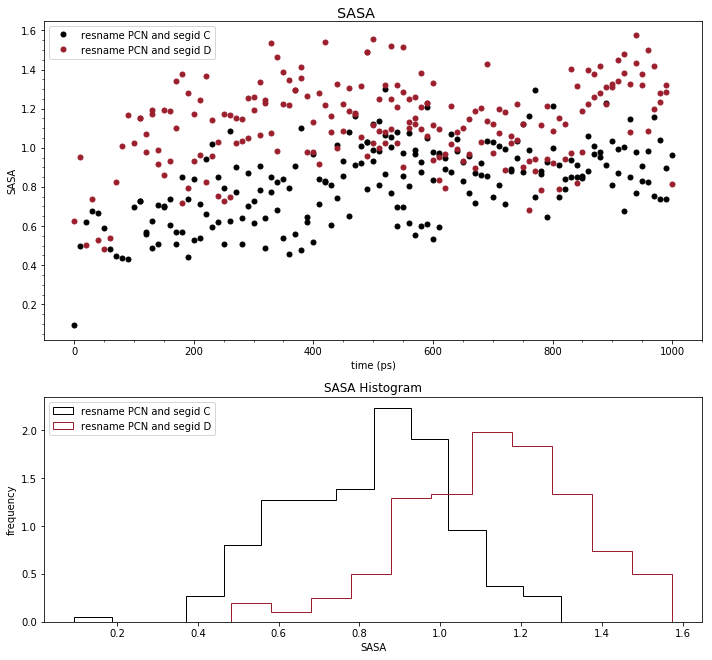

In [14]:
# Plot the results
import matplotlib.pyplot as plt
fig = plt.figure(1)
plt.suptitle('SASA', y = 1, fontsize = 'x-large')
gridspec.GridSpec(8,5)

plt.subplot2grid((8,5), (4,0), colspan=5, rowspan=3)
plt.hist(dSASA['resname PCN and segid C'],'auto', density = 1, color='black', histtype='step', stacked=True, label ='resname PCN and segid C')
plt.hist(dSASA['resname PCN and segid D'],'auto', density = 1, color='#9c1f2e', histtype='step', stacked=True, label ='resname PCN and segid D')
plt.legend(loc="best", markerscale=10)
plt.xlabel("SASA")
plt.ylabel("frequency")
plt.title("SASA Histogram")

ax = plt.subplot2grid((8,5), (0,0), colspan=5, rowspan=4)
ax.plot(dSASA['time'], dSASA['resname PCN and segid C'], '.',markersize=10, color='black', label ='resname PCN and segid C')
ax.plot(dSASA['time'], dSASA['resname PCN and segid D'], '.',markersize=10, color='#9c1f2e', label ='resname PCN and segid D')
ax.set_xlabel("time (ps)")
ax.set_ylabel(r"SASA")
plt.minorticks_on()
plt.legend(loc="best", markerscale=1)

fig.set_size_inches(w=10,h=10)
fig.tight_layout()
#plt.savefig("SASA.png")
plt.show()

### Residues Neighboring Probe

In [15]:
prox.analysis

<function CGH_Methods.prox.analysis(lUniverses, searchAtoms, radius, fileName)>

In [16]:
prox.analysis(lUniverses=[u1, u2, u3], searchAtoms="segid C and resname PCN and (name C45 or name N46)", radius=4, fileName="200616_pickle_prox_C")

In [17]:
prox.analysis(lUniverses=[u1, u2, u3], searchAtoms="segid D and resname PCN and (name C45 or name N46)", radius=4, fileName="200616_pickle_prox_D")

In [18]:
lProxC = pickle.load("200616_pickle_prox_C")
lProxD = pickle.load("200616_pickle_prox_D")

In [19]:
lProxC

[{'segid': 'A',
  'resname': 'VAL',
  'resid': 76,
  'count': 202,
  'countPercentage': 2.0,
  'full_string': 'A VAL 76'},
 {'segid': '',
  'resname': 'SOL',
  'resid': 15764,
  'count': 189,
  'countPercentage': 1.8712871287128714,
  'full_string': ' SOL 15764'},
 {'segid': '',
  'resname': 'SOL',
  'resid': 12832,
  'count': 188,
  'countPercentage': 1.8613861386138615,
  'full_string': ' SOL 12832'},
 {'segid': 'A',
  'resname': 'GLY',
  'resid': 79,
  'count': 180,
  'countPercentage': 1.7821782178217822,
  'full_string': 'A GLY 79'},
 {'segid': '',
  'resname': 'SOL',
  'resid': 12842,
  'count': 178,
  'countPercentage': 1.7623762376237624,
  'full_string': ' SOL 12842'},
 {'segid': 'A',
  'resname': 'MET',
  'resid': 77,
  'count': 177,
  'countPercentage': 1.7524752475247525,
  'full_string': 'A MET 77'},
 {'segid': 'A',
  'resname': 'HIS',
  'resid': 70,
  'count': 160,
  'countPercentage': 1.5841584158415842,
  'full_string': 'A HIS 70'},
 {'segid': 'A',
  'resname': 'PRO',
 

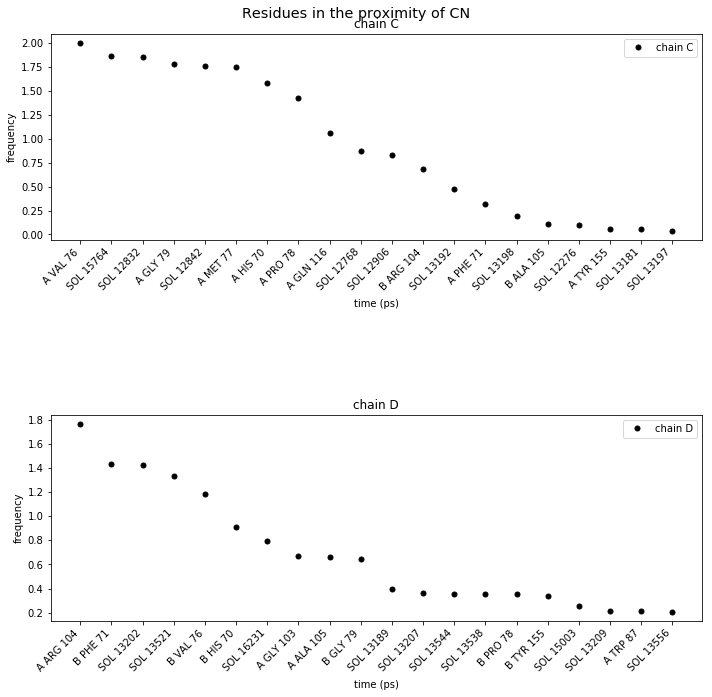

In [20]:
# Plot the results
import matplotlib.pyplot as plt
fig = plt.figure(1)
plt.suptitle('Residues in the proximity of CN', y = 1, fontsize = 'x-large')
gridspec.GridSpec(8,5)

ax = plt.subplot2grid((8,5), (0,0), colspan=5, rowspan=3)
ax.plot(prox.xval([lProxC],bChain=True), prox.yval([lProxC],bPercentage=True)[0], '.',markersize=10, color='black', label ='chain C')
ax.set_xlabel("time (ps)")
ax.set_ylabel(r"frequency")
plt.xticks(prox.xval([lProxC],bChain=True), rotation=45, horizontalalignment="right")
plt.legend(loc="best", markerscale=1)
plt.title("chain C")

ax = plt.subplot2grid((8,5), (4,0), colspan=5, rowspan=3)
ax.plot(prox.xval([lProxD],bChain=True), prox.yval([lProxD],bPercentage=True)[0], '.',markersize=10, color='black', label ='chain D')
ax.set_xlabel("time (ps)")
ax.set_ylabel(r"frequency")
plt.xticks(prox.xval([lProxD],bChain=True), rotation=45, horizontalalignment="right")
plt.legend(loc="best", markerscale=1)
plt.title("chain D")

fig.set_size_inches(w=10,h=10)
fig.tight_layout()
#plt.savefig("prox.png")
plt.show()